COVID-19 pandemic impacted the whole world, overwhelming healthcare systems - unprepared for such intense and lengthy requests for ICU beds, professionals, personal protection equipment, and healthcare resources. <br>
Fast, reliable, and early clinical assessment of the severity of the disease can help in allocating and prioritizing resources to reduce mortality. <br>
***If we Early Predict admission to the ICU of confirmed COVID-19 cases ,so that ICU resources can be arranged or patient transfer can be scheduled at early stages to save the life of the Patient.***

In [1]:
# pip install autopep8 --user

In [2]:
# pip install category_encoders

In [3]:
# pip install xgboost

In [4]:
# !pip3 install pandas_profiling --upgrade

In [5]:
# pip install autoviz

In [6]:
# !pip install bayesian-optimization
# !pip install scikit-optimize 

In [7]:
# pip install pandas-profiling

In [8]:
# pip install graphviz

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

# Use this in Jupyter notebooks to display static images inline
%matplotlib inline

# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import category_encoders as ce
import graphviz

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score,RocCurveDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier


#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV

from collections import Counter

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


*** About the DATA ***
The data file contains information on demographics, comorbidities, admission laboratory values, admission medications, admission supplemental oxygen orders, discharge and mortality. <br>
The data relate to COVID-19 patients admitted to a single healthcare system, over a specific period of time, and separated into the 1st 3 weeks of the pandemic and the 2nd 3 weeks of the pandemic.
<br>
<br>
Some of the variables included in the dataset are: length of hospital stay (LOS), myocardial infraction (MI), peripheral vascular disease (PVD), congestive heart failure (CHF), cardiovascular disease (CVD), dementia (Dement), Chronic obstructive pulmonary disease (COPD), diabetes mellitus simple (DM simple), diabetes mellitus complicated (DM complicated), oxygen saturation (OsSats), mean arterial pressure, in mmHg (MAP), D-dimer, in mg/ml (Ddimer), platelets, in k per mm3 (Plts), international normalized ratio (INR), blood urea nitrogen, in mg/dL (BUN), alanine aminotransferase, in U/liter (AST), while blood cells, in per mm3 (WBC) and interleukin-6, in pg/ml (IL-6).

In [3]:
# reading dataset of .xlsx format from excel
data = pd.read_excel('Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx')

In [4]:
data

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6,IL6 > 150,FerritinYes,Ferritin,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,3,1,95,0,1,36.888889,0,1,102.666667,0,1,0.63,0,1,205,0,1,1.1,0,1,16.0,0,1,0.70,0,1,135.0,0,1,112.0,0,1,26.0,0,1,14.0,0,1,5.6,1,1,1.4,0,0,0.0,0,0,0.0,0,1,0.4999,0,0,0.0000,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,1,1,89,1,1,36.333333,0,1,86.000000,0,1,2.86,0,1,254,0,1,1.4,0,1,206.0,1,1,9.20,2,1,137.0,0,1,265.0,0,1,85.0,1,1,32.0,0,1,12.2,1,1,0.3,1,0,0.0,0,1,885.0,1,1,14.9000,1,1,0.6000,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,94,3,1,99,0,1,39.222222,1,1,67.333333,0,1,2.78,0,1,137,1,1,1.0,0,1,85.0,1,1,3.46,2,1,140.0,0,1,121.0,0,1,32.0,0,1,18.0,0,1,6.1,1,1,0.5,1,1,324.1,1,1,629.0,1,1,33.9000,1,1,1.2000,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,72,2,1,86,1,1,38.888889,1,1,102.666667,0,1,3.02,1,1,223,0,1,1.3,1,0,0.0,0,1,8.30,2,1,132.0,0,0,0.0,0,1,44.0,1,1,17.0,0,1,3.7,0,1,0.5,1,0,0.0,0,1,816.0,1,1,18.4000,1,1,7.3000,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,2,1,93,1,1,38.055556,1,1,104.333333,0,1,1.65,0,1,125,1,1,1.0,0,0,0.0,0,1,2.60,2,1,149.0,0,0,0.0,0,1,38.0,0,1,28.0,0,1,5.7,1,1,1.4,0,1,39.4,0,1,1691.0,1,1,11.6000,1,0,0.0000,0,1,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,0,1,4,0,>70,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,2,1,0,1,1,0.000000,0,0,0.000000,0,1,3.28,1,1,348,0,1,1.1,1,1,8.0,0,1,0.70,0,1,139.0,0,1,97.0,0,1,23.0,0,1,24.0,0,1,10.3,1,1,1.0,0,0,0.0,0,1,295.0,0,1,1.8000,0,1,0.0999,0,1,0.01,0
4707,0,1,2,0,>60,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,0,91,1,0,37.000000,0,1,86.666667,0,1,0.52,0,1,185,0,1,1.0,0,1,13.0,0,1,0.60,0,1,136.0,0,0,0.0,0,1,40.0,0,1,30.0,0,1,4.1,0,1,1.2,0,0,0.0,0,1,1165.0,1,1,3.1000,0,1,0.0999,0,1,0.01,0
4708,0,0,0,0,>60,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,1,1,95,0,1,36.555556,0,1,99.666667,0,1,0.37,0,1,341,0,1,1.0,0,1,7.0,0,1,0.80,0,1,136.0,0,1,153.0,0,1,26.0,0,1,16.0,0,1,7.4,1,1,1.0,0,0,0.0,0,1,239.0,0,1,0.4999,0,1,0.0000,0,0,0.00,0
4709,0,0,0,0,>80,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,3,1,95,0,1,36.888889,0,1,85.666667,0,1,0.87,0,1,484,0,1,1.0,0,1,17.0,0,1,1.09,0,1,137.0,0,1,131.0,0,1,31.0,0,1,33.0,0,1,7.6,1,1,1.8,0,0,0.0,0,1,1185.0,1,1,8.6000,0,1,0.1000,0,1,0.01,0


# 1) Exploratory Data  Analysis 




In [5]:
data.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6,IL6 > 150,FerritinYes,Ferritin,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.00000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.369985,0.098917,0.025685,0.372108,0.042666,0.187434,0.114838,0.107408,0.078964,0.056251,0.105073,0.145617,0.176820,0.128847,0.103587,0.012312,0.008066,0.018680,0.030779,0.005731,63.369561,1.126300,0.962641,89.593717,0.395245,0.965400,35.812000,0.181278,0.952664,81.747400,0.071959,0.790703,3.222452,0.244322,0.973679,226.393972,0.250478,0.909149,1.104989,0.244322,0.881766,27.196555,0.272766,0.971556,1.947453,0.481002,0.962216,131.210578,0.125663,0.708554,127.809807,0.024199,0.949268,63.207930,0.450223,0.958183,42.846904,0.274252,0.973891,8.471598,0.825939,0.973891,1.308682,0.450860,0.440459,125.035013,0.061770,0.720442,1056.68945,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.482852,0.298583,0.158209,0.483418,0.202125,0.408897,0.318860,0.309664,0.269711,0.230431,0.306680,0.352759,0.381557,0.335067,0.304757,0.110284,0.089459,0.135405,0.172737,0.075496,16.701791,1.096012,0.189661,18.967412,0.488955,0.182784,7.739367,0.385289,0.212379,24.490415,0.258448,0.406850,5.269067,0.429730,0.160106,115.134763,0.557222,0.287428,0.997571,0.429730,0.322919,31.215784,0.445429,0.166255,2.637810,0.772408,0.190693,31.016418,0.331505,0.454476,131.011864,0.153682,0.219474,204.495438,0.497569,0.200192,108.989407,0.446184,0.159477,7.356330,0.379202,0.159477,4.863028,0.497632,0.496495,2238.546108,0.240763,0.448830,3096.44975,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [6]:
# sort a dataframe based on column names
data.sort_index(axis = 1)

,ALT,ALT > 40,ALTYes,AST,AST > 40,ASTYes,Age,Age.1,AgeScore,All CNS,Asian,BUN,BUN > 30,BUNYes,Black,C-Reactive Prot > 10,CHF,COPD,CVD,CrctProtYes,CrctProtein,Creatinine,CrtnScore,CrtnYes,D-Dimer > 3,DDimerYes,DEMENT,DM Complicated,DM Simple,Ddimer,Death,Derivation cohort,Ferritin,Ferritin > 300,FerritinYes,Glucose,Glucose <60 or > 500,GlucoseYese,IL6,IL6 > 150,IL6Yes,INR,INR > 1.2,INRYes,LOS,LOS_Y,Latino,Lympho,LymphoYes,Lymphocytes < 1,MAP,MAP < 70,MI,MapYes,O2 Sat < 94,O2SatsYes,OldOtherNeuro,OldSyncope,OsSats,OtherBrnLsn,PVD,Plts,PltsScore,PltsYes,ProCalCYes,Procalciton > 0.1,Procalcitonin,Pure CNS,Renal Disease,Seizure,Severity,SodimuYes,Sodium,Sodium < 139 or > 154,Stroke,Temp,Temp > 38,TempYes,TropYes,Troponin,Troponin > 0.1,WBC,WBC <1.8 or > 4.8,WBCYes,White
0,14.0,0,1,26.0,0,1,>80,89,3,0,0,16.0,0,1,0,0,0,0,0,1,0.4999,0.70,0,1,0,1,0,0,0,0.63,0,1,0.0,0,0,112.0,0,1,0.0,0,0,1.1,0,1,1,1,0,1.4,1,0,102.666667,0,0,1,0,1,0,0,95,0,0,205,0,1,0,0,0.0000,0,0,0,3,1,135.0,0,0,36.888889,0,1,1,0.01,0,5.6,1,1,0
1,32.0,0,1,85.0,1,1,>60,67,1,0,0,206.0,1,1,0,1,0,0,0,1,14.9000,9.20,2,1,0,1,0,0,0,2.86,1,1,885.0,1,1,265.0,0,1,0.0,0,0,1.4,0,1,2,1,0,0.3,1,1,86.000000,0,0,1,1,1,0,0,89,0,1,254,0,1,1,1,0.6000,0,0,0,7,1,137.0,0,0,36.333333,0,1,1,1.20,1,12.2,1,1,1
2,18.0,0,1,32.0,0,1,>80,94,3,0,0,85.0,1,1,0,1,1,1,1,1,33.9000,3.46,2,1,0,1,1,0,0,2.78,1,1,629.0,1,1,121.0,0,1,324.1,1,1,1.0,0,1,2,1,0,0.5,1,1,67.333333,0,0,1,0,1,0,0,99,0,1,137,1,1,1,1,1.2000,0,1,0,7,1,140.0,0,0,39.222222,1,1,0,0.00,0,6.1,1,1,1
3,17.0,0,1,44.0,1,1,>70,72,2,1,0,0.0,0,0,1,1,0,0,0,1,18.4000,8.30,2,1,1,1,1,0,1,3.02,0,1,816.0,1,1,0.0,0,0,0.0,0,0,1.3,1,1,15,1,0,0.5,1,1,102.666667,0,1,1,1,1,0,0,86,0,0,223,0,1,1,1,7.3000,1,0,0,9,1,132.0,0,0,38.888889,1,1,1,0.05,0,3.7,0,1,0
4,28.0,0,1,38.0,0,1,>70,71,2,0,0,0.0,0,0,1,1,0,0,0,1,11.6000,2.60,2,1,0,1,0,0,0,1.65,0,1,1691.0,1,1,0.0,0,0,39.4,0,1,1.0,0,1,9,1,0,1.4,1,0,104.333333,0,0,1,1,1,0,0,93,0,0,125,1,1,0,0,0.0000,0,0,0,7,1,149.0,0,0,38.055556,1,1,1,0.01,0,5.7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,24.0,0,1,23.0,0,1,>70,74,2,0,1,8.0,0,1,0,0,0,0,0,1,1.8000,0.70,0,1,1,1,0,0,0,3.28,0,0,295.0,0,1,97.0,0,1,0.0,0,0,1.1,1,1,4,1,0,1.0,1,0,0.000000,0,0,0,1,1,0,0,0,0,0,348,0,1,1,0,0.0999,0,0,0,4,1,139.0,0,0,0.000000,0,1,1,0.01,0,10.3,1,1,0
4707,30.0,0,1,40.0,0,1,>60,66,1,0,0,13.0,0,1,0,0,0,0,0,1,3.1000,0.60,0,1,0,1,0,0,0,0.52,0,0,1165.0,1,1,0.0,0,0,0.0,0,0,1.0,0,1,2,1,1,1.2,1,0,86.666667,0,0,1,1,0,0,0,91,0,1,185,0,1,1,0,0.0999,0,0,0,2,1,136.0,0,0,37.000000,0,0,1,0.01,0,4.1,0,1,0
4708,16.0,0,1,26.0,0,1,>60,61,1,0,0,7.0,0,1,0,0,0,0,0,1,0.4999,0.80,0,1,0,1,0,0,0,0.37,0,0,239.0,0,1,153.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.0,1,0,99.666667,0,0,1,0,1,0,0,95,0,1,341,0,1,1,0,0.0000,0,0,0,1,1,136.0,0,0,36.555556,0,1,0,0.00,0,7.4,1,1,0
4709,33.0,0,1,31.0,0,1,>80,88,3,0,0,17.0,0,1,1,0,0,0,0,1,8.6000,1.09,0,1,0,1,0,0,0,0.87,0,0,1185.0,1,1,131.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.8,1,0,85.666667,0,0,1,0,1,0,0,95,0,1,484,0,1,1,0,0.1000,0,0,0,3,1,137.0,0,0,36.888889,0,1,1,0.01,0,7.6,1,1,0


In [7]:
data.iloc[:20,0:72]

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6
0,1,1,1,0,>80,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,3,1,95,0,1,36.888889,0,1,102.666667,0,1,0.63,0,1,205,0,1,1.1,0,1,16.0,0,1,0.70,0,1,135.0,0,1,112.0,0,1,26.000,0,1,14.0,0,1,5.6,1,1,1.4,0,0,0.0000
1,1,1,2,1,>60,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,1,1,89,1,1,36.333333,0,1,86.000000,0,1,2.86,0,1,254,0,1,1.4,0,1,206.0,1,1,9.20,2,1,137.0,0,1,265.0,0,1,85.000,1,1,32.0,0,1,12.2,1,1,0.3,1,0,0.0000
2,1,1,2,1,>80,7,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,94,3,1,99,0,1,39.222222,1,1,67.333333,0,1,2.78,0,1,137,1,1,1.0,0,1,85.0,1,1,3.46,2,1,140.0,0,1,121.0,0,1,32.000,0,1,18.0,0,1,6.1,1,1,0.5,1,1,324.1000
3,1,1,15,0,>70,9,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,72,2,1,86,1,1,38.888889,1,1,102.666667,0,1,3.02,1,1,223,0,1,1.3,1,0,0.0,0,1,8.30,2,1,132.0,0,0,0.0,0,1,44.000,1,1,17.0,0,1,3.7,0,1,0.5,1,0,0.0000
4,1,1,9,0,>70,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,2,1,93,1,1,38.055556,1,1,104.333333,0,1,1.65,0,1,125,1,1,1.0,0,0,0.0,0,1,2.60,2,1,149.0,0,0,0.0,0,1,38.000,0,1,28.0,0,1,5.7,1,1,1.4,0,1,39.4000
5,1,1,14,1,>70,5,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,74,2,1,92,1,1,38.777778,1,1,50.666667,1,0,0.00,0,1,158,0,1,1.8,0,1,23.0,0,1,0.98,0,1,135.0,0,1,205.0,0,1,21.000,0,1,15.0,0,1,10.0,1,1,0.5,1,0,0.0000
6,1,1,4,0,>70,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,71,2,1,96,0,1,37.055556,0,1,96.666667,0,1,2.11,0,1,258,0,1,0.9,0,1,14.0,0,1,0.70,0,1,137.0,0,1,159.0,0,0,0.000,0,0,0.0,0,1,5.4,1,1,1.2,0,0,0.0000
7,1,1,3,0,>60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,1,99,0,1,36.944444,0,1,62.333333,0,1,0.81,0,1,130,1,1,1.2,0,0,0.0,0,1,1.43,0,1,141.0,0,0,0.0,0,1,44.000,1,1,18.0,0,1,5.8,1,1,0.8,1,1,57.5000
8,1,1,9,0,>60,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,1,94,0,1,38.388889,1,1,84.666667,0,1,3.14,1,1,241,0,1,1.1,1,1,27.0,0,1,3.58,2,1,137.0,0,0,0.0,0,1,45.000,1,1,30.0,0,1,5.6,1,1,0.6,1,0,0.0000
9,1,1,3,0,>80,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,3,1,95,0,1,36.666667,0,1,82.333333,0,1,4.25,1,1,364,0,1,1.1,1,1,20.0,0,1,1.50,0,1,135.0,0,1,132.0,0,1,54.000,1,1,26.0,0,1,7.4,1,1,1.2,0,1,48.2000


Explore each type of variable and identify the predicted and target variable

In [8]:
data.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'Crc

### Abbreviations of columns in Dataset

* LOS_Y -  Length of hospital Stay(Yes/NO)
* LOS-     Length of hospital Stay(in days)
* MI -     myocardial infraction
* PVD -    peripheral vascular disease
* CHF-     congestive heart failure
* CVD-     cardiovascular disease
* Dement-  dementia
* COPD-    Chronic obstructive pulmonary disease
* DM Simple- Diabetes mellitus simple
* DM Complicated- Diabetes mellitus complicated
* Pure CNS- Pure Central nervous System
* OsSats-   oxygen saturation
* MAP-      mean arterial pressure, in mmHg 
* Ddimer-   D-dimer, in mg/ml 
* Plts-     platelets, in k per mm3 
* INR-      International normalized ratio
* BUN-      blood urea nitrogen, in mg/dL (BUN)
* AST-      alanine aminotransferase, in U/liter
* WBC-      white blood cells, in per mm3 
* IL-6-     interleukin-6, in pg/ml
* Lympho-   Lymphocytes
* CrctProtein- C-Reactive Protein

DATA TYPES

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Derivation cohort      4711 non-null   int64  
 1   LOS_Y                  4711 non-null   int64  
 2   LOS                    4711 non-null   int64  
 3   Death                  4711 non-null   int64  
 4   Age                    4711 non-null   object 
 5   Severity               4711 non-null   int64  
 6   Black                  4711 non-null   int64  
 7   White                  4711 non-null   int64  
 8   Asian                  4711 non-null   int64  
 9   Latino                 4711 non-null   int64  
 10  MI                     4711 non-null   int64  
 11  PVD                    4711 non-null   int64  
 12  CHF                    4711 non-null   int64  
 13  CVD                    4711 non-null   int64  
 14  DEMENT                 4711 non-null   int64  
 15  COPD

In [10]:
# pd.set_option("max_rows", 85)
print(data.dtypes)

Derivation cohort          int64
LOS_Y                      int64
LOS                        int64
Death                      int64
Age                       object
Severity                   int64
Black                      int64
White                      int64
Asian                      int64
Latino                     int64
MI                         int64
PVD                        int64
CHF                        int64
CVD                        int64
DEMENT                     int64
COPD                       int64
DM Complicated             int64
DM Simple                  int64
Renal Disease              int64
All CNS                    int64
Pure CNS                   int64
Stroke                     int64
Seizure                    int64
OldSyncope                 int64
OldOtherNeuro              int64
OtherBrnLsn                int64
Age.1                      int64
AgeScore                   int64
O2SatsYes                  int64
OsSats                     int64
O2 Sat < 9

In [11]:
data['Derivation cohort'].unique()

array([1, 0])

Differentiating categorical variable(make a threshold of 5) and continous variable

In [12]:
# Verify discrete features columns after drop process
cat_vars = list()         # store categorical variable
continous_var=list()
for j in data.columns:
    if len(data[j].unique()) <= 5:
        cat_vars.append(j)
        print('Categorical variable - ',j)
    else:
        continous_var.append(j)
        
print('This dataset have ',len(cat_vars), 'of ', len(data.columns),' discrete variables with 5 or less categories.\n\n')

for c in cat_vars:
    print(c, ' - ', data[c].unique())

Categorical variable -  Derivation cohort
Categorical variable -  LOS_Y
Categorical variable -  Death
Categorical variable -  Age
Categorical variable -  Black
Categorical variable -  White
Categorical variable -  Asian
Categorical variable -  Latino
Categorical variable -  MI
Categorical variable -  PVD
Categorical variable -  CHF
Categorical variable -  CVD
Categorical variable -  DEMENT
Categorical variable -  COPD
Categorical variable -  DM Complicated
Categorical variable -  DM Simple
Categorical variable -  Renal Disease
Categorical variable -  All CNS
Categorical variable -  Pure CNS
Categorical variable -  Stroke
Categorical variable -  Seizure
Categorical variable -  OldSyncope
Categorical variable -  OldOtherNeuro
Categorical variable -  OtherBrnLsn
Categorical variable -  AgeScore
Categorical variable -  O2SatsYes
Categorical variable -  O2 Sat < 94
Categorical variable -  TempYes
Categorical variable -  Temp > 38
Categorical variable -  MapYes
Categorical variable -  MAP < 

### Conclusion
 This dataset has 63 categorical (with 5 or less category) variables and  22 continous variables

## Data Analysis by Pandas Profiling Report

In [13]:
prof=ProfileReport(data)

In [14]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Dividing the Data into Predictor(X_data) and Target Variable(Y_data)

In [13]:
X_data=data[data.columns.difference(['Death'])]   # select-all-columns-except-one-given-column-in-a-pandas-dataframe

In [14]:
X_data.columns    # death is our target variable

Index(['ALT', 'ALT > 40', 'ALTYes', 'AST', 'AST > 40', 'ASTYes', 'Age',
       'Age.1', 'AgeScore', 'All CNS', 'Asian', 'BUN', 'BUN > 30', 'BUNYes',
       'Black', 'C-Reactive Prot > 10', 'CHF', 'COPD', 'CVD', 'CrctProtYes',
       'CrctProtein', 'Creatinine', 'CrtnScore', 'CrtnYes', 'D-Dimer > 3',
       'DDimerYes', 'DEMENT', 'DM Complicated', 'DM Simple', 'Ddimer',
       'Derivation cohort', 'Ferritin', 'Ferritin > 300', 'FerritinYes',
       'Glucose', 'Glucose <60 or > 500', 'GlucoseYese', 'IL6', 'IL6 > 150',
       'IL6Yes', 'INR', 'INR > 1.2', 'INRYes', 'LOS', 'LOS_Y', 'Latino',
       'Lympho', 'LymphoYes', 'Lymphocytes < 1', 'MAP', 'MAP < 70', 'MI',
       'MapYes', 'O2 Sat < 94', 'O2SatsYes', 'OldOtherNeuro', 'OldSyncope',
       'OsSats', 'OtherBrnLsn', 'PVD', 'Plts', 'PltsScore', 'PltsYes',
       'ProCalCYes', 'Procalciton > 0.1', 'Procalcitonin', 'Pure CNS',
       'Renal Disease', 'Seizure', 'Severity', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'Stroke', '

In [15]:
X_data

,ALT,ALT > 40,ALTYes,AST,AST > 40,ASTYes,Age,Age.1,AgeScore,All CNS,Asian,BUN,BUN > 30,BUNYes,Black,C-Reactive Prot > 10,CHF,COPD,CVD,CrctProtYes,CrctProtein,Creatinine,CrtnScore,CrtnYes,D-Dimer > 3,DDimerYes,DEMENT,DM Complicated,DM Simple,Ddimer,Derivation cohort,Ferritin,Ferritin > 300,FerritinYes,Glucose,Glucose <60 or > 500,GlucoseYese,IL6,IL6 > 150,IL6Yes,INR,INR > 1.2,INRYes,LOS,LOS_Y,Latino,Lympho,LymphoYes,Lymphocytes < 1,MAP,MAP < 70,MI,MapYes,O2 Sat < 94,O2SatsYes,OldOtherNeuro,OldSyncope,OsSats,OtherBrnLsn,PVD,Plts,PltsScore,PltsYes,ProCalCYes,Procalciton > 0.1,Procalcitonin,Pure CNS,Renal Disease,Seizure,Severity,SodimuYes,Sodium,Sodium < 139 or > 154,Stroke,Temp,Temp > 38,TempYes,TropYes,Troponin,Troponin > 0.1,WBC,WBC <1.8 or > 4.8,WBCYes,White
0,14.0,0,1,26.0,0,1,>80,89,3,0,0,16.0,0,1,0,0,0,0,0,1,0.4999,0.70,0,1,0,1,0,0,0,0.63,1,0.0,0,0,112.0,0,1,0.0,0,0,1.1,0,1,1,1,0,1.4,1,0,102.666667,0,0,1,0,1,0,0,95,0,0,205,0,1,0,0,0.0000,0,0,0,3,1,135.0,0,0,36.888889,0,1,1,0.01,0,5.6,1,1,0
1,32.0,0,1,85.0,1,1,>60,67,1,0,0,206.0,1,1,0,1,0,0,0,1,14.9000,9.20,2,1,0,1,0,0,0,2.86,1,885.0,1,1,265.0,0,1,0.0,0,0,1.4,0,1,2,1,0,0.3,1,1,86.000000,0,0,1,1,1,0,0,89,0,1,254,0,1,1,1,0.6000,0,0,0,7,1,137.0,0,0,36.333333,0,1,1,1.20,1,12.2,1,1,1
2,18.0,0,1,32.0,0,1,>80,94,3,0,0,85.0,1,1,0,1,1,1,1,1,33.9000,3.46,2,1,0,1,1,0,0,2.78,1,629.0,1,1,121.0,0,1,324.1,1,1,1.0,0,1,2,1,0,0.5,1,1,67.333333,0,0,1,0,1,0,0,99,0,1,137,1,1,1,1,1.2000,0,1,0,7,1,140.0,0,0,39.222222,1,1,0,0.00,0,6.1,1,1,1
3,17.0,0,1,44.0,1,1,>70,72,2,1,0,0.0,0,0,1,1,0,0,0,1,18.4000,8.30,2,1,1,1,1,0,1,3.02,1,816.0,1,1,0.0,0,0,0.0,0,0,1.3,1,1,15,1,0,0.5,1,1,102.666667,0,1,1,1,1,0,0,86,0,0,223,0,1,1,1,7.3000,1,0,0,9,1,132.0,0,0,38.888889,1,1,1,0.05,0,3.7,0,1,0
4,28.0,0,1,38.0,0,1,>70,71,2,0,0,0.0,0,0,1,1,0,0,0,1,11.6000,2.60,2,1,0,1,0,0,0,1.65,1,1691.0,1,1,0.0,0,0,39.4,0,1,1.0,0,1,9,1,0,1.4,1,0,104.333333,0,0,1,1,1,0,0,93,0,0,125,1,1,0,0,0.0000,0,0,0,7,1,149.0,0,0,38.055556,1,1,1,0.01,0,5.7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,24.0,0,1,23.0,0,1,>70,74,2,0,1,8.0,0,1,0,0,0,0,0,1,1.8000,0.70,0,1,1,1,0,0,0,3.28,0,295.0,0,1,97.0,0,1,0.0,0,0,1.1,1,1,4,1,0,1.0,1,0,0.000000,0,0,0,1,1,0,0,0,0,0,348,0,1,1,0,0.0999,0,0,0,4,1,139.0,0,0,0.000000,0,1,1,0.01,0,10.3,1,1,0
4707,30.0,0,1,40.0,0,1,>60,66,1,0,0,13.0,0,1,0,0,0,0,0,1,3.1000,0.60,0,1,0,1,0,0,0,0.52,0,1165.0,1,1,0.0,0,0,0.0,0,0,1.0,0,1,2,1,1,1.2,1,0,86.666667,0,0,1,1,0,0,0,91,0,1,185,0,1,1,0,0.0999,0,0,0,2,1,136.0,0,0,37.000000,0,0,1,0.01,0,4.1,0,1,0
4708,16.0,0,1,26.0,0,1,>60,61,1,0,0,7.0,0,1,0,0,0,0,0,1,0.4999,0.80,0,1,0,1,0,0,0,0.37,0,239.0,0,1,153.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.0,1,0,99.666667,0,0,1,0,1,0,0,95,0,1,341,0,1,1,0,0.0000,0,0,0,1,1,136.0,0,0,36.555556,0,1,0,0.00,0,7.4,1,1,0
4709,33.0,0,1,31.0,0,1,>80,88,3,0,0,17.0,0,1,1,0,0,0,0,1,8.6000,1.09,0,1,0,1,0,0,0,0.87,0,1185.0,1,1,131.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.8,1,0,85.666667,0,0,1,0,1,0,0,95,0,1,484,0,1,1,0,0.1000,0,0,0,3,1,137.0,0,0,36.888889,0,1,1,0.01,0,7.6,1,1,0


In [16]:
Y_data=data['Death']

In [17]:
Y_data

0       0
1       1
2       1
3       0
4       0
       ..
4706    0
4707    0
4708    0
4709    0
4710    0
Name: Death, Length: 4711, dtype: int64

#2) Feature Engineering

The process to obtain the Target Encoding is relatively straightforward and it can be summarised as:
* Group the data by category
* Calculate the average of the target variable per each group
* Assign the average to each observation belonging to that group

Now, Age has Object datatype basically it is a string. So , we have use `Target Encoding` instead of `One-hot encoding`.<br>
Target Encoding is a powerful solution also because it avoids generating a high number of features, as is the case for One-Hot Encoding, keeping the dimensionality of the dataset as the original one.

#### 2.1 Feature Age is Target encoded

In [19]:
X_data['Age'].unique()

array(['>80', '>60', '>70', '0-60'], dtype=object)

In [20]:
encoder=ce.target_encoder.TargetEncoder(cols=['Age'])

In [21]:
encoder.fit(X_data, Y_data)
X_cleaned = encoder.transform(X_data)

In [22]:
X_cleaned        #X_data after encoding age as a target encoder

,ALT,ALT > 40,ALTYes,AST,AST > 40,ASTYes,Age,Age.1,AgeScore,All CNS,Asian,BUN,BUN > 30,BUNYes,Black,C-Reactive Prot > 10,CHF,COPD,CVD,CrctProtYes,CrctProtein,Creatinine,CrtnScore,CrtnYes,D-Dimer > 3,DDimerYes,DEMENT,DM Complicated,DM Simple,Ddimer,Derivation cohort,Ferritin,Ferritin > 300,FerritinYes,Glucose,Glucose <60 or > 500,GlucoseYese,IL6,IL6 > 150,IL6Yes,INR,INR > 1.2,INRYes,LOS,LOS_Y,Latino,Lympho,LymphoYes,Lymphocytes < 1,MAP,MAP < 70,MI,MapYes,O2 Sat < 94,O2SatsYes,OldOtherNeuro,OldSyncope,OsSats,OtherBrnLsn,PVD,Plts,PltsScore,PltsYes,ProCalCYes,Procalciton > 0.1,Procalcitonin,Pure CNS,Renal Disease,Seizure,Severity,SodimuYes,Sodium,Sodium < 139 or > 154,Stroke,Temp,Temp > 38,TempYes,TropYes,Troponin,Troponin > 0.1,WBC,WBC <1.8 or > 4.8,WBCYes,White
0,14.0,0,1,26.0,0,1,0.439161,89,3,0,0,16.0,0,1,0,0,0,0,0,1,0.4999,0.70,0,1,0,1,0,0,0,0.63,1,0.0,0,0,112.0,0,1,0.0,0,0,1.1,0,1,1,1,0,1.4,1,0,102.666667,0,0,1,0,1,0,0,95,0,0,205,0,1,0,0,0.0000,0,0,0,3,1,135.0,0,0,36.888889,0,1,1,0.01,0,5.6,1,1,0
1,32.0,0,1,85.0,1,1,0.244880,67,1,0,0,206.0,1,1,0,1,0,0,0,1,14.9000,9.20,2,1,0,1,0,0,0,2.86,1,885.0,1,1,265.0,0,1,0.0,0,0,1.4,0,1,2,1,0,0.3,1,1,86.000000,0,0,1,1,1,0,0,89,0,1,254,0,1,1,1,0.6000,0,0,0,7,1,137.0,0,0,36.333333,0,1,1,1.20,1,12.2,1,1,1
2,18.0,0,1,32.0,0,1,0.439161,94,3,0,0,85.0,1,1,0,1,1,1,1,1,33.9000,3.46,2,1,0,1,1,0,0,2.78,1,629.0,1,1,121.0,0,1,324.1,1,1,1.0,0,1,2,1,0,0.5,1,1,67.333333,0,0,1,0,1,0,0,99,0,1,137,1,1,1,1,1.2000,0,1,0,7,1,140.0,0,0,39.222222,1,1,0,0.00,0,6.1,1,1,1
3,17.0,0,1,44.0,1,1,0.348381,72,2,1,0,0.0,0,0,1,1,0,0,0,1,18.4000,8.30,2,1,1,1,1,0,1,3.02,1,816.0,1,1,0.0,0,0,0.0,0,0,1.3,1,1,15,1,0,0.5,1,1,102.666667,0,1,1,1,1,0,0,86,0,0,223,0,1,1,1,7.3000,1,0,0,9,1,132.0,0,0,38.888889,1,1,1,0.05,0,3.7,0,1,0
4,28.0,0,1,38.0,0,1,0.348381,71,2,0,0,0.0,0,0,1,1,0,0,0,1,11.6000,2.60,2,1,0,1,0,0,0,1.65,1,1691.0,1,1,0.0,0,0,39.4,0,1,1.0,0,1,9,1,0,1.4,1,0,104.333333,0,0,1,1,1,0,0,93,0,0,125,1,1,0,0,0.0000,0,0,0,7,1,149.0,0,0,38.055556,1,1,1,0.01,0,5.7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,24.0,0,1,23.0,0,1,0.348381,74,2,0,1,8.0,0,1,0,0,0,0,0,1,1.8000,0.70,0,1,1,1,0,0,0,3.28,0,295.0,0,1,97.0,0,1,0.0,0,0,1.1,1,1,4,1,0,1.0,1,0,0.000000,0,0,0,1,1,0,0,0,0,0,348,0,1,1,0,0.0999,0,0,0,4,1,139.0,0,0,0.000000,0,1,1,0.01,0,10.3,1,1,0
4707,30.0,0,1,40.0,0,1,0.244880,66,1,0,0,13.0,0,1,0,0,0,0,0,1,3.1000,0.60,0,1,0,1,0,0,0,0.52,0,1165.0,1,1,0.0,0,0,0.0,0,0,1.0,0,1,2,1,1,1.2,1,0,86.666667,0,0,1,1,0,0,0,91,0,1,185,0,1,1,0,0.0999,0,0,0,2,1,136.0,0,0,37.000000,0,0,1,0.01,0,4.1,0,1,0
4708,16.0,0,1,26.0,0,1,0.244880,61,1,0,0,7.0,0,1,0,0,0,0,0,1,0.4999,0.80,0,1,0,1,0,0,0,0.37,0,239.0,0,1,153.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.0,1,0,99.666667,0,0,1,0,1,0,0,95,0,1,341,0,1,1,0,0.0000,0,0,0,1,1,136.0,0,0,36.555556,0,1,0,0.00,0,7.4,1,1,0
4709,33.0,0,1,31.0,0,1,0.439161,88,3,0,0,17.0,0,1,1,0,0,0,0,1,8.6000,1.09,0,1,0,1,0,0,0,0.87,0,1185.0,1,1,131.0,0,1,0.0,0,0,1.0,0,1,0,0,0,1.8,1,0,85.666667,0,0,1,0,1,0,0,95,0,1,484,0,1,1,0,0.1000,0,0,0,3,1,137.0,0,0,36.888889,0,1,1,0.01,0,7.6,1,1,0


In [23]:
X_cleaned.shape

(4711, 84)

In [24]:
# Target Encoding the 'Age' in data
data['Age']=X_cleaned['Age']

In [25]:
data.head(5)

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6,IL6 > 150,FerritinYes,Ferritin,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,0.439161,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,3,1,95,0,1,36.888889,0,1,102.666667,0,1,0.63,0,1,205,0,1,1.1,0,1,16.0,0,1,0.70,0,1,135.0,0,1,112.0,0,1,26.0,0,1,14.0,0,1,5.6,1,1,1.4,0,0,0.0,0,0,0.0,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,0.244880,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,1,1,89,1,1,36.333333,0,1,86.000000,0,1,2.86,0,1,254,0,1,1.4,0,1,206.0,1,1,9.20,2,1,137.0,0,1,265.0,0,1,85.0,1,1,32.0,0,1,12.2,1,1,0.3,1,0,0.0,0,1,885.0,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,0.439161,7,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,94,3,1,99,0,1,39.222222,1,1,67.333333,0,1,2.78,0,1,137,1,1,1.0,0,1,85.0,1,1,3.46,2,1,140.0,0,1,121.0,0,1,32.0,0,1,18.0,0,1,6.1,1,1,0.5,1,1,324.1,1,1,629.0,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,0.348381,9,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,72,2,1,86,1,1,38.888889,1,1,102.666667,0,1,3.02,1,1,223,0,1,1.3,1,0,0.0,0,1,8.30,2,1,132.0,0,0,0.0,0,1,44.0,1,1,17.0,0,1,3.7,0,1,0.5,1,0,0.0,0,1,816.0,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,0.348381,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,2,1,93,1,1,38.055556,1,1,104.333333,0,1,1.65,0,1,125,1,1,1.0,0,0,0.0,0,1,2.60,2,1,149.0,0,0,0.0,0,1,38.0,0,1,28.0,0,1,5.7,1,1,1.4,0,1,39.4,0,1,1691.0,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [26]:
X_cleaned['Temp'].unique()

array([ 36.88888889,  36.33333333,  39.22222222,  38.88888889,
        38.05555556,  38.77777778,  37.05555556,  36.94444444,
        38.38888889,  36.66666667,  37.94444444,  37.22222222,
        37.33333333,  37.72222222,  37.61111111,  37.27777778,
        36.11111111,  37.88888889,  36.72222222,  38.66666667,
        37.        ,  38.72222222,  36.77777778,  37.5       ,
        37.55555556,  38.27777778,  38.55555556,  36.16666667,
        39.        ,  37.16666667,  39.38888889,  35.16666667,
        38.44444444,  36.83333333,  36.22222222,  38.16666667,
        39.55555556,  37.11111111,  37.77777778,  39.44444444,
        37.44444444,  38.94444444,  36.55555556,   0.        ,
       -17.77777778,  38.        ,  35.72222222,  38.22222222,
        37.38888889,  36.44444444,  36.61111111,  38.61111111,
        39.33333333,  38.33333333,  37.66666667,  37.83333333,
        36.5       ,  34.77777778,  39.88888889,  39.16666667,
        34.5       ,  35.61111111,  36.27777778,  35.55

***Now, Temp Column has some of the negative values which will cause error in future and are type of Outliers, So we can replace all negative values with 0 .***

In [27]:
for i,val in enumerate(X_cleaned['Temp']):
    if val<0:
        X_cleaned['Temp'][i]=0


In [28]:
#X_cleaned

In [29]:
# dataset before spliting into train and test
X_data=X_cleaned
Y_data=Y_data

In [30]:
data.shape

(4711, 85)

### 2.2 Dividing the data into train and test split 

In [31]:
# To check the unlabeled data
sum(data['Death'])/len(data)

0.2436849925705795

24% of the data is predicting mortality=1

In [32]:
mask= data['Derivation cohort']==1
X_train=X_data[mask]
X_test=X_data[~mask]
Y_train=Y_data[mask]
Y_test=Y_data[~mask]

In [33]:
print(sum(Y_train)/len(Y_train))
print(sum(Y_test)/len(Y_test))

0.26380628717077315
0.22358930844293592


In [34]:
# X_train=X_train.drop(columns='Age')
# X_train=X_train[X_train.columns.difference(['Death'])]
# X_train

In [35]:
# X_test=X_test.drop(columns='Age')
# X_test=X_test[X_test.columns.difference(['Death'])]         # include all columns except death
# X_test

In [36]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

        ALT   ALT > 40  ALTYes    AST   AST > 40  ASTYes     Age    Age.1  \
0     14.000      0        1    26.000      0        1    0.439161   89     
1     32.000      0        1    85.000      1        1    0.244880   67     
2     18.000      0        1    32.000      0        1    0.439161   94     
3     17.000      0        1    44.000      1        1    0.348381   72     
4     28.000      0        1    38.000      0        1    0.348381   71     
...      ...       ...     ...     ...       ...     ...       ...    ...   
2349   9.999      0        1    29.000      0        1    0.110032   26     
2350  31.000      0        1    33.000      0        1    0.244880   68     
2351  10.000      0        1    19.999      0        1    0.439161   83     
2352  21.000      0        1    95.000      1        1    0.110032   53     
2353  26.000      0        1    24.000      0        1    0.348381   71     

      AgeScore  All CNS  Asian   BUN   BUN > 30  BUNYes  Black  \
0        

In [37]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

        ALT   ALT > 40  ALTYes    AST   AST > 40  ASTYes     Age    Age.1  \
0     14.000      0        1    26.000      0        1    0.439161   89     
1     32.000      0        1    85.000      1        1    0.244880   67     
2     18.000      0        1    32.000      0        1    0.439161   94     
3     17.000      0        1    44.000      1        1    0.348381   72     
4     28.000      0        1    38.000      0        1    0.348381   71     
...      ...       ...     ...     ...       ...     ...       ...    ...   
2349   9.999      0        1    29.000      0        1    0.110032   26     
2350  31.000      0        1    33.000      0        1    0.244880   68     
2351  10.000      0        1    19.999      0        1    0.439161   83     
2352  21.000      0        1    95.000      1        1    0.110032   53     
2353  26.000      0        1    24.000      0        1    0.348381   71     

      AgeScore  All CNS  Asian   BUN   BUN > 30  BUNYes  Black  \
0        

In [ ]:
from pickle import dump,load

# 3) Feature Selection

In [38]:
num_features_opt = 35   # the number of features that we need to choose as a result
num_features_max = 40   # the somewhat excessive number of features, which we will choose at each stage
features_best = []     # This will contain best features of list by applying all feature selection algo

 ### 3.1 FS with the Pearson correlation

**How does correlation help in feature selection?**

`Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.`

In [39]:
# Threshold for removing correlated variables
threshold = 0.75

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'     
    else:
        style = 'background-color: palegreen'
    return style

# Absolute value correlation matrix
corr_matrix=X_cleaned.corr().abs().round(2)        
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))       # upper triangular matrix
# print(upper)
upper.style.format("{:.2f}").applymap(highlight)

In [40]:
# Select columns with correlations above threshold
collinear_feature=[column for column in upper.columns if any(upper[column]>=threshold)]
print(f"No of highly correlated features: {len(collinear_feature)}\n")
print(collinear_feature)
filtered_features=X_data.drop(columns=collinear_feature)

print('\nThe number of features that passed the collinearity threshold: ', filtered_features.shape[1])
features_best.append(filtered_features.columns.tolist())

No of highly correlated features: 16

['ASTYes', 'Age.1', 'AgeScore', 'BUN > 30', 'CrctProtein', 'CrtnYes', 'DM Simple', 'INR > 1.2', 'LymphoYes', 'PltsYes', 'Pure CNS', 'SodimuYes', 'Temp', 'TempYes', 'WBC', 'WBCYes']

The number of features that passed the collinearity threshold:  68


In [41]:
filtered_features.columns

Index(['ALT', 'ALT > 40', 'ALTYes', 'AST', 'AST > 40', 'Age', 'All CNS',
       'Asian', 'BUN', 'BUNYes', 'Black', 'C-Reactive Prot > 10', 'CHF',
       'COPD', 'CVD', 'CrctProtYes', 'Creatinine', 'CrtnScore', 'D-Dimer > 3',
       'DDimerYes', 'DEMENT', 'DM Complicated', 'Ddimer', 'Derivation cohort',
       'Ferritin', 'Ferritin > 300', 'FerritinYes', 'Glucose',
       'Glucose <60 or > 500', 'GlucoseYese', 'IL6', 'IL6 > 150', 'IL6Yes',
       'INR', 'INRYes', 'LOS', 'LOS_Y', 'Latino', 'Lympho', 'Lymphocytes < 1',
       'MAP', 'MAP < 70', 'MI', 'MapYes', 'O2 Sat < 94', 'O2SatsYes',
       'OldOtherNeuro', 'OldSyncope', 'OsSats', 'OtherBrnLsn', 'PVD', 'Plts',
       'PltsScore', 'ProCalCYes', 'Procalciton > 0.1', 'Procalcitonin',
       'Renal Disease', 'Seizure', 'Severity', 'Sodium',
       'Sodium < 139 or > 154', 'Stroke', 'Temp > 38', 'TropYes', 'Troponin',
       'Troponin > 0.1', 'WBC <1.8 or > 4.8', 'White'],
      dtype='object')

In [42]:
collinear_feature

['ASTYes',
 'Age.1',
 'AgeScore',
 'BUN > 30',
 'CrctProtein',
 'CrtnYes',
 'DM Simple',
 'INR > 1.2',
 'LymphoYes',
 'PltsYes',
 'Pure CNS',
 'SodimuYes',
 'Temp',
 'TempYes',
 'WBC',
 'WBCYes']

### 3.2  FS by the SelectFromModel with LinearSVC

`SelectFromModel`- Meta-transformer for selecting features based on importance weights.

`SelectFromModel` is a meta-transformer that can be used alongside any estimator `that assigns importance to each feature through a specific attribute (such as coef_ , feature_importances_ ) or via an importance_getter callable after fitting.`

`LinearSVC-` (Linear Support Vector Classification).Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [43]:
lsvc=LinearSVC(C=0.2,penalty='l1',dual=False).fit(X_data,Y_data)
model = SelectFromModel(lsvc, prefit=True)
X_new=model.transform(X_data)
X_selected_df = pd.DataFrame(X_new, columns=[X_data.columns[i] for i in range(len(X_data.columns)) if model.get_support()[i]])

print('selected:feature:',X_selected_df.shape[1])
Not_selected_feature=set(X_data.columns) ^ set(X_selected_df.columns)
print('Not selected feature :',Not_selected_feature)
features_best.append(X_selected_df.columns.tolist())




selected:feature: 68
Not selected feature : {'PltsScore', 'LymphoYes', 'PltsYes', 'LOS', 'DM Simple', 'WBCYes', 'MI', 'INR', 'All CNS', 'SodimuYes', 'D-Dimer > 3', 'CHF', 'INR > 1.2', 'Age', 'Ferritin', 'IL6'}


In [44]:
X_data.shape[1]

84

### 3.3 FS by the SelectFromModel with Lasso

****About LassoCV**** - Lasso linear model with iterative fitting along a regularization path.
The best model is selected by cross-validation.
* The Lasso is a `linear model` that estimates `sparse coefficients`. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.
* As the Lasso regression yields sparse models, it can thus be used to perform feature selection
* Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

 

In [45]:
# cv - Specify the value of KFold in cross-validation
lasso = LassoCV(cv=3).fit(X_data,Y_data)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_data)
X_selected_df = pd.DataFrame(X_new, columns=[X_data.columns[i] for i in range(len(X_data.columns)) if model.get_support()[i]])

print('selected:feature:',X_selected_df.shape[1])
Not_selected_feature=(set(X_data.columns) ^ set(X_selected_df.columns))    # To find not selected feature
print('Not selected feature :',Not_selected_feature)
print('Selected feature:',X_selected_df.columns)
features_best.append(X_selected_df.columns.tolist())

selected:feature: 11
Not selected feature : {'WBC', 'Renal Disease', 'Lymphocytes < 1', 'LymphoYes', 'O2 Sat < 94', 'OldOtherNeuro', 'BUNYes', 'IL6Yes', 'Ddimer', 'MAP < 70', 'PltsYes', 'CrctProtYes', 'Severity', 'CrtnScore', 'DM Simple', 'OldSyncope', 'INR', 'All CNS', 'DM Complicated', 'AST > 40', 'WBC <1.8 or > 4.8', 'BUN > 30', 'Asian', 'Procalciton > 0.1', 'Lympho', 'TropYes', 'IL6 > 150', 'DEMENT', 'ALTYes', 'C-Reactive Prot > 10', 'INR > 1.2', 'ALT > 40', 'Age', 'Troponin > 0.1', 'Latino', 'OsSats', 'INRYes', 'AgeScore', 'PltsScore', 'Creatinine', 'Glucose <60 or > 500', 'FerritinYes', 'DDimerYes', 'Sodium', 'CVD', 'Black', 'LOS_Y', 'ASTYes', 'O2SatsYes', 'WBCYes', 'MI', 'Derivation cohort', 'COPD', 'ProCalCYes', 'Sodium < 139 or > 154', 'SodimuYes', 'Ferritin > 300', 'Seizure', 'TempYes', 'OtherBrnLsn', 'CrtnYes', 'GlucoseYese', 'D-Dimer > 3', 'Stroke', 'CHF', 'MapYes', 'Pure CNS', 'Troponin', 'Ferritin', 'IL6', 'PVD', 'Temp > 38', 'White'}
Selected feature: Index(['ALT', 'AST'

### 3.4 FS by the SelectKBest with Chi-2

In [46]:
# k- select best k features nut k='all' will select all feature with their Score
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_data, Y_data)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']   #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
# pd.set_option("max_rows", 85)
print(featureScores.nlargest(len(dfcolumns),'Score')) 

          Feature              Score    
31               Ferritin  390989.638485
37                    IL6  228380.041488
3                     AST   21919.121876
11                    BUN    6436.528764
0                     ALT    4242.987305
65          Procalcitonin    3449.275132
20            CrctProtein    2679.236243
49                    MAP    2204.589139
7                   Age.1    1765.442447
69               Severity    1279.399445
29                 Ddimer    1245.781301
60                   Plts     930.092423
50               MAP < 70     675.197336
43                    LOS     592.975746
8                AgeScore     411.045546
34                Glucose     392.338439
21             Creatinine     353.488904
22              CrtnScore     299.742500
80                    WBC     153.508981
12               BUN > 30     144.302464
64      Procalciton > 0.1     133.410310
15   C-Reactive Prot > 10     109.581747
38              IL6 > 150     107.945377
79         Tropo

From Select K best Method
* Top 5 best feature are:<br>
Ferritin
IL6  
AST  
BUN  
ALT
<br>
* Least 5  feature are:<br>
SodimuYes  
MapYes     
IL6Yes     
Lympho     
DM Simple

### 3.5 FS by the Recursive Feature Elimination (RFE) with Logistic Regression

***Recursive Feature elimination:*** It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [47]:
rfe_selector=RFE(estimator=LogisticRegression(),n_features_to_select=num_features_max,step=10,verbose=2)  # Feature ranking with recursive feature elimination
rfe_selector.fit(X_data,Y_data)
rfe_support=rfe_selector.get_support()
rfe_feature=X_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected_feature')

Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
40 selected_feature


In [48]:
features_best.append(rfe_feature)

In [49]:
data.shape

(4711, 85)

### 3.6 FS by the Recursive Feature Elimination (RFE) with Random Forest

In [50]:
embeded_rf_selector=SelectFromModel(RandomForestClassifier(n_estimators=200),threshold='1.25*median')  
embeded_rf_selector.fit(X_data,Y_data)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [51]:
embeded_rf_support=embeded_rf_selector.get_support()   # get_support() - Get a mask, or integer index, of the features selected
embeded_rf_feature=X_data.loc[:,embeded_rf_support].columns.tolist()
print('features selected:' ,embeded_rf_feature)
print(str(len(embeded_rf_feature)),'selected features')


features selected: ['ALT', 'AST', 'AST > 40', 'Age', 'Age.1', 'AgeScore', 'BUN', 'BUN > 30', 'BUNYes', 'C-Reactive Prot > 10', 'CrctProtein', 'Creatinine', 'CrtnScore', 'DDimerYes', 'Ddimer', 'Derivation cohort', 'Ferritin', 'Glucose', 'IL6', 'INR', 'LOS', 'LOS_Y', 'Lympho', 'MAP', 'MAP < 70', 'O2 Sat < 94', 'OsSats', 'Plts', 'Procalciton > 0.1', 'Procalcitonin', 'Severity', 'Sodium', 'Temp', 'Troponin', 'WBC']
35 selected features


In [52]:
features_best.append(embeded_rf_feature)

### 3.7 FS by the VarianceThreshold

Thanks to sklearn.feature_selection.VarianceThreshold <br> - Feature selector that removes all low-variance features.

In [53]:
# Check whether all features have a sufficiently different meaning

# This feature selection algorithm looks only at the features (X), not the
# desired outputs (y), and can thus be used for unsupervised learning.
selector= VarianceThreshold(threshold=10)  #Feature selector that removes all low-variance features.
np.shape(selector.fit_transform(X_data))
features_best.append(list(np.array(X_data.columns)[selector.get_support(indices=False)]))

## Selecting the Best Feature

In [54]:
features_best

[['ALT',
  'ALT > 40',
  'ALTYes',
  'AST',
  'AST > 40',
  'Age',
  'All CNS',
  'Asian',
  'BUN',
  'BUNYes',
  'Black',
  'C-Reactive Prot > 10',
  'CHF',
  'COPD',
  'CVD',
  'CrctProtYes',
  'Creatinine',
  'CrtnScore',
  'D-Dimer > 3',
  'DDimerYes',
  'DEMENT',
  'DM Complicated',
  'Ddimer',
  'Derivation cohort',
  'Ferritin',
  'Ferritin > 300',
  'FerritinYes',
  'Glucose',
  'Glucose <60 or > 500',
  'GlucoseYese',
  'IL6',
  'IL6 > 150',
  'IL6Yes',
  'INR',
  'INRYes',
  'LOS',
  'LOS_Y',
  'Latino',
  'Lympho',
  'Lymphocytes < 1',
  'MAP',
  'MAP < 70',
  'MI',
  'MapYes',
  'O2 Sat < 94',
  'O2SatsYes',
  'OldOtherNeuro',
  'OldSyncope',
  'OsSats',
  'OtherBrnLsn',
  'PVD',
  'Plts',
  'PltsScore',
  'ProCalCYes',
  'Procalciton > 0.1',
  'Procalcitonin',
  'Renal Disease',
  'Seizure',
  'Severity',
  'Sodium',
  'Sodium < 139 or > 154',
  'Stroke',
  'Temp > 38',
  'TropYes',
  'Troponin',
  'Troponin > 0.1',
  'WBC <1.8 or > 4.8',
  'White'],
 ['ALT',
  'ALT > 40',

In [55]:
# The Element is in atleast one list of optimal features
main_cols_max=features_best[0]

for i in range(len(features_best)-1):
  main_cols_max= list(set(main_cols_max) | set(features_best[i+1]))
main_cols_max

['WBC',
 'PltsScore',
 'MAP',
 'Renal Disease',
 'Creatinine',
 'Lymphocytes < 1',
 'LymphoYes',
 'Glucose <60 or > 500',
 'FerritinYes',
 'O2 Sat < 94',
 'OldOtherNeuro',
 'BUNYes',
 'DDimerYes',
 'IL6Yes',
 'Sodium',
 'Ddimer',
 'BUN',
 'CVD',
 'Temp',
 'Black',
 'MAP < 70',
 'PltsYes',
 'LOS_Y',
 'Procalcitonin',
 'CrctProtYes',
 'Severity',
 'ASTYes',
 'LOS',
 'O2SatsYes',
 'CrtnScore',
 'DM Simple',
 'Age.1',
 'WBCYes',
 'OldSyncope',
 'MI',
 'INR',
 'Plts',
 'Derivation cohort',
 'AST',
 'All CNS',
 'DM Complicated',
 'AST > 40',
 'COPD',
 'WBC <1.8 or > 4.8',
 'Glucose',
 'BUN > 30',
 'Asian',
 'Procalciton > 0.1',
 'Lympho',
 'ProCalCYes',
 'Sodium < 139 or > 154',
 'SodimuYes',
 'Ferritin > 300',
 'Seizure',
 'TropYes',
 'IL6 > 150',
 'TempYes',
 'DEMENT',
 'OtherBrnLsn',
 'CrtnYes',
 'GlucoseYese',
 'D-Dimer > 3',
 'ALTYes',
 'Stroke',
 'C-Reactive Prot > 10',
 'CHF',
 'INR > 1.2',
 'MapYes',
 'ALT > 40',
 'CrctProtein',
 'Pure CNS',
 'Age',
 'Troponin',
 'ALT',
 'Ferritin',


In [56]:
len(main_cols_max)

84

In [57]:
# The element is in all lists of optimal features
main_cols_min = features_best[0]
for i in range(len(features_best)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(features_best[i+1])))
main_cols_min

[]

NO feature is common in all feature selection algorithm

Now, we will try to find out the most common feature from all the feature selection algo.

In [58]:
# Most common features in all list  of optimal feature
main_features=[]
# initializing all feature to 0
main_features_opt={feature_name: 0 for feature_name in X_data.columns.tolist()}
for i in  range(len(features_best)):
  for feature_name in features_best[i]:
    main_features_opt[feature_name]+=1
df_main_features_opt=pd.DataFrame.from_dict(main_features_opt,orient='index',columns=['Num'])
df_main_features_opt.sort_values(by=['Num'],ascending=False).head(num_features_opt)

,Num
ALT,6
Plts,6
AST,6
Procalcitonin,6
MAP,6
BUN,6
Glucose,6
Troponin,5
OsSats,5
O2 Sat < 94,5


Selected most common top 35 features

In [59]:
main_features=df_main_features_opt.nlargest(num_features_opt,'Num').index.tolist()
if not 'Death' in main_features:
  main_features.append('Death')

main_features

['ALT',
 'AST',
 'BUN',
 'Glucose',
 'MAP',
 'Plts',
 'Procalcitonin',
 'Age.1',
 'C-Reactive Prot > 10',
 'CrctProtein',
 'Ddimer',
 'LOS',
 'MAP < 70',
 'O2 Sat < 94',
 'OsSats',
 'Procalciton > 0.1',
 'Severity',
 'Sodium',
 'Troponin',
 'AST > 40',
 'AgeScore',
 'BUN > 30',
 'BUNYes',
 'Creatinine',
 'CrtnScore',
 'DDimerYes',
 'Ferritin',
 'IL6',
 'IL6 > 150',
 'LOS_Y',
 'Lympho',
 'Lymphocytes < 1',
 'PVD',
 'Stroke',
 'Temp',
 'Death']

# 4) EDA for Model Selection

In [60]:
# set_option(pat, value)
# Sets the value of the specified option.
# pd.set_option('max_columns',len(main_features)+1)

len(main_features)

36

In [61]:
main_features

['ALT',
 'AST',
 'BUN',
 'Glucose',
 'MAP',
 'Plts',
 'Procalcitonin',
 'Age.1',
 'C-Reactive Prot > 10',
 'CrctProtein',
 'Ddimer',
 'LOS',
 'MAP < 70',
 'O2 Sat < 94',
 'OsSats',
 'Procalciton > 0.1',
 'Severity',
 'Sodium',
 'Troponin',
 'AST > 40',
 'AgeScore',
 'BUN > 30',
 'BUNYes',
 'Creatinine',
 'CrtnScore',
 'DDimerYes',
 'Ferritin',
 'IL6',
 'IL6 > 150',
 'LOS_Y',
 'Lympho',
 'Lymphocytes < 1',
 'PVD',
 'Stroke',
 'Temp',
 'Death']

## 4.1 AutoViz

AutoViz(AutoVisualization) is a python library which can automate the whole process of Data Visualization in just a single line of code.

In [76]:
data.to_csv('data_EDA.csv',index=False)

In [ ]:
AV = AutoViz_Class()
data = pd.read_csv('./data_EDA.csv')
df = AV.AutoViz(filename="",sep=',', depVar='Death', dfte=data, header=0, verbose=2, lowess=False, 
                chart_format='svg',  max_cols_analyzed=60)

## 4.2 Pandas profiling

In [65]:
data.head()

In [66]:
pr=ProfileReport(data[main_features])

In [67]:
# pr

In [62]:
print(main_features)

['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1', 'C-Reactive Prot > 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP < 70', 'O2 Sat < 94', 'OsSats', 'Procalciton > 0.1', 'Severity', 'Sodium', 'Troponin', 'AST > 40', 'AgeScore', 'BUN > 30', 'BUNYes', 'Creatinine', 'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 > 150', 'LOS_Y', 'Lympho', 'Lymphocytes < 1', 'PVD', 'Stroke', 'Temp', 'Death']


In [63]:
data[main_features]

,ALT,AST,BUN,Glucose,MAP,Plts,Procalcitonin,Age.1,C-Reactive Prot > 10,CrctProtein,Ddimer,LOS,MAP < 70,O2 Sat < 94,OsSats,Procalciton > 0.1,Severity,Sodium,Troponin,AST > 40,AgeScore,BUN > 30,BUNYes,Creatinine,CrtnScore,DDimerYes,Ferritin,IL6,IL6 > 150,LOS_Y,Lympho,Lymphocytes < 1,PVD,Stroke,Temp,Death
0,14.0,26.0,16.0,112.0,102.666667,205,0.0000,89,0,0.4999,0.63,1,0,0,95,0,3,135.0,0.01,0,3,0,1,0.70,0,1,0.0,0.0,0,1,1.4,0,0,0,36.888889,0
1,32.0,85.0,206.0,265.0,86.000000,254,0.6000,67,1,14.9000,2.86,2,0,1,89,1,7,137.0,1.20,1,1,1,1,9.20,2,1,885.0,0.0,0,1,0.3,1,1,0,36.333333,1
2,18.0,32.0,85.0,121.0,67.333333,137,1.2000,94,1,33.9000,2.78,2,0,0,99,1,7,140.0,0.00,0,3,1,1,3.46,2,1,629.0,324.1,1,1,0.5,1,1,0,39.222222,1
3,17.0,44.0,0.0,0.0,102.666667,223,7.3000,72,1,18.4000,3.02,15,0,1,86,1,9,132.0,0.05,1,2,0,0,8.30,2,1,816.0,0.0,0,1,0.5,1,0,0,38.888889,0
4,28.0,38.0,0.0,0.0,104.333333,125,0.0000,71,1,11.6000,1.65,9,0,1,93,0,7,149.0,0.01,0,2,0,0,2.60,2,1,1691.0,39.4,0,1,1.4,0,0,0,38.055556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4706,24.0,23.0,8.0,97.0,0.000000,348,0.0999,74,0,1.8000,3.28,4,0,1,0,0,4,139.0,0.01,0,2,0,1,0.70,0,1,295.0,0.0,0,1,1.0,0,0,0,0.000000,0
4707,30.0,40.0,13.0,0.0,86.666667,185,0.0999,66,0,3.1000,0.52,2,0,1,91,0,2,136.0,0.01,0,1,0,1,0.60,0,1,1165.0,0.0,0,1,1.2,0,1,0,37.000000,0
4708,16.0,26.0,7.0,153.0,99.666667,341,0.0000,61,0,0.4999,0.37,0,0,0,95,0,1,136.0,0.00,0,1,0,1,0.80,0,1,239.0,0.0,0,0,1.0,0,1,0,36.555556,0
4709,33.0,31.0,17.0,131.0,85.666667,484,0.1000,88,0,8.6000,0.87,0,0,0,95,0,3,137.0,0.01,0,3,0,1,1.09,0,1,1185.0,0.0,0,0,1.8,0,1,0,36.888889,0


# 5) Preparing to modeling

In [64]:
# Target
target_name = 'Death'
target0 = data[target_name]
train0 =data[main_features].drop([target_name], axis=1)

In [66]:
train0.shape

(4711, 35)

In [67]:
train0.head()

,ALT,AST,BUN,Glucose,MAP,Plts,Procalcitonin,Age.1,C-Reactive Prot > 10,CrctProtein,Ddimer,LOS,MAP < 70,O2 Sat < 94,OsSats,Procalciton > 0.1,Severity,Sodium,Troponin,AST > 40,AgeScore,BUN > 30,BUNYes,Creatinine,CrtnScore,DDimerYes,Ferritin,IL6,IL6 > 150,LOS_Y,Lympho,Lymphocytes < 1,PVD,Stroke,Temp
0,14.0,26.0,16.0,112.0,102.666667,205,0.0,89,0,0.4999,0.63,1,0,0,95,0,3,135.0,0.01,0,3,0,1,0.70,0,1,0.0,0.0,0,1,1.4,0,0,0,36.888889
1,32.0,85.0,206.0,265.0,86.000000,254,0.6,67,1,14.9000,2.86,2,0,1,89,1,7,137.0,1.20,1,1,1,1,9.20,2,1,885.0,0.0,0,1,0.3,1,1,0,36.333333
2,18.0,32.0,85.0,121.0,67.333333,137,1.2,94,1,33.9000,2.78,2,0,0,99,1,7,140.0,0.00,0,3,1,1,3.46,2,1,629.0,324.1,1,1,0.5,1,1,0,39.222222
3,17.0,44.0,0.0,0.0,102.666667,223,7.3,72,1,18.4000,3.02,15,0,1,86,1,9,132.0,0.05,1,2,0,0,8.30,2,1,816.0,0.0,0,1,0.5,1,0,0,38.888889
4,28.0,38.0,0.0,0.0,104.333333,125,0.0,71,1,11.6000,1.65,9,0,1,93,0,7,149.0,0.01,0,2,0,0,2.60,2,1,1691.0,39.4,0,1,1.4,0,0,0,38.055556


In [68]:
target0

0       0
1       1
2       1
3       0
4       0
       ..
4706    0
4707    0
4708    0
4709    0
4710    0
Name: Death, Length: 4711, dtype: int64

In [69]:
# For Boosting Model
train0b=train0.copy()    #copying a dataframe 

#splitting the selected features dataframe into train and test split
trainb,testb,targetb,target_testb=train_test_split(train0b,target0,test_size=0.25,random_state=42)

# stratify parameter can be used to split the dataset into the train and test with same % of unbalance data as in data before splitting

In [70]:
print(trainb.shape)
print(testb.shape)
print(targetb.shape)
print(target_testb.shape)

(3533, 35)
(1178, 35)
(3533,)
(1178,)


In [71]:
sum(targetb)/len(targetb)

0.24115482592697424

In [72]:
sum(target_testb)/len(target_testb)

0.25127334465195245

* **RobustScaler-** This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
* **MinMAxScaler-** This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [73]:
# For Models from Sklearn
#first apply MinMaxScaler then Robust Scaler
scaler=MinMaxScaler()     #Transform features by scaling each feature to a given range.
train0=pd.DataFrame(scaler.fit_transform(train0),columns=train0.columns)


#scaler2=StandardScaler()
scaler2=RobustScaler()  # Scale features using statistics that are robust to outliers.
train0=pd.DataFrame(scaler2.fit_transform(train0),columns=train0.columns)

In [74]:
# Synthesis valid as test for selection Models
train,test,target,target_test=train_test_split(train0,target0,test_size=0.25)

In [75]:
counter=Counter(target)

* train -  Training dataset
* target - target of training data
* test -   Testing dataset 
* target_test- target of testing_data

In [76]:
train.head(3)

,ALT,AST,BUN,Glucose,MAP,Plts,Procalcitonin,Age.1,C-Reactive Prot > 10,CrctProtein,Ddimer,LOS,MAP < 70,O2 Sat < 94,OsSats,Procalciton > 0.1,Severity,Sodium,Troponin,AST > 40,AgeScore,BUN > 30,BUNYes,Creatinine,CrtnScore,DDimerYes,Ferritin,IL6,IL6 > 150,LOS_Y,Lympho,Lymphocytes < 1,PVD,Stroke,Temp
961,-0.111111,-0.153846,0.869565,1.426829,0.264463,-0.636364,0.50,0.181818,1.0,0.556291,0.338129,0.333333,0.0,0.0,0.5,1.0,0.000000,-1.666667,0.0,0.0,0.0,1.0,0.0,0.30,0.0,0.0,-0.376959,0.000000,0.0,0.0,0.285714,0.0,0.0,0.0,1.055556
1429,0.296296,-0.179487,1.173913,0.298780,-0.066116,0.181818,0.25,-0.136364,0.0,-0.019868,6.769788,0.333333,0.0,0.0,0.0,1.0,-0.333333,3.000000,0.0,0.0,0.0,1.0,0.0,0.08,0.0,0.0,1.305379,0.416667,0.0,0.0,-0.142857,1.0,0.0,0.0,0.833333
1211,1.000000,0.846154,-0.434783,-0.152439,-0.099174,-0.033058,-0.25,-0.227273,0.0,-0.430464,-0.424460,-0.166667,0.0,0.0,0.0,0.0,-0.666667,0.000000,0.0,1.0,-0.5,0.0,0.0,-0.53,0.0,-1.0,-0.376959,0.000000,0.0,0.0,0.428571,0.0,0.0,0.0,1.277778


In [77]:
test.head(3)

,ALT,AST,BUN,Glucose,MAP,Plts,Procalcitonin,Age.1,C-Reactive Prot > 10,CrctProtein,Ddimer,LOS,MAP < 70,O2 Sat < 94,OsSats,Procalciton > 0.1,Severity,Sodium,Troponin,AST > 40,AgeScore,BUN > 30,BUNYes,Creatinine,CrtnScore,DDimerYes,Ferritin,IL6,IL6 > 150,LOS_Y,Lympho,Lymphocytes < 1,PVD,Stroke,Temp
2163,0.259259,0.589744,3.565217,1.926829,0.958678,-0.380165,-0.25,0.000000,0.0,0.231788,0.812950,0.500000,0.0,1.0,-0.250,0.0,1.0,-0.500000,1.0,1.0,0.0,1.0,0.0,12.20,2.0,0.0,0.554850,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,-0.722222
4054,0.592593,1.307692,0.260870,0.128049,0.479339,1.900826,4.50,-0.045455,1.0,1.807947,6.769788,0.333333,0.0,1.0,-1.000,1.0,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,-0.19,0.0,0.0,0.537061,0.0,0.0,0.0,0.428571,0.0,0.0,0.0,-0.611111
3441,-0.592593,-0.461564,-0.391304,-0.713415,0.132231,0.586777,-0.25,-1.863636,0.0,-0.370861,0.082734,-0.500000,0.0,0.0,0.625,0.0,-1.0,0.166667,-1.0,0.0,-0.5,0.0,0.0,-0.37,0.0,0.0,-0.376959,0.0,0.0,0.0,2.142857,0.0,0.5,0.0,-0.222222


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 961 to 2593
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ALT                   3533 non-null   float64
 1   AST                   3533 non-null   float64
 2   BUN                   3533 non-null   float64
 3   Glucose               3533 non-null   float64
 4   MAP                   3533 non-null   float64
 5   Plts                  3533 non-null   float64
 6   Procalcitonin         3533 non-null   float64
 7   Age.1                 3533 non-null   float64
 8   C-Reactive Prot > 10  3533 non-null   float64
 9   CrctProtein           3533 non-null   float64
 10  Ddimer                3533 non-null   float64
 11  LOS                   3533 non-null   float64
 12  MAP < 70              3533 non-null   float64
 13  O2 Sat < 94           3533 non-null   float64
 14  OsSats                3533 non-null   float64
 15  Procalciton > 0.1  

In [79]:
cv_n_split=10
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4] # you can only select some numbers of metrics from metrics_all

In [80]:
# list of accuracy of all model- amount of metrics_now *2(train & test dataset)
num_models=20
acc_train=[]
acc_test=[]
acc_all=np.empty((len(metrics_now)*2,0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [81]:
# Splitting train data for model tuning with cross-validation
#ShuffleSplit()-Random permutation cross-validator
cv_train=ShuffleSplit(n_splits=cv_n_split,test_size=0.25,random_state=42)  #Yields indices to split data into training and test sets.

In [82]:
cv_train

ShuffleSplit(n_splits=10, random_state=42, test_size=0.25, train_size=None)

In [83]:
def acc_d(y_meas,y_pred):
  # Relative error between predicted y_pred and measured y_meas values
  return mean_absolute_error(y_meas,y_pred)*len(y_meas) / sum(abs(y_meas));

  
def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

 ***Confusion matrix built by Confusion matrix() function***

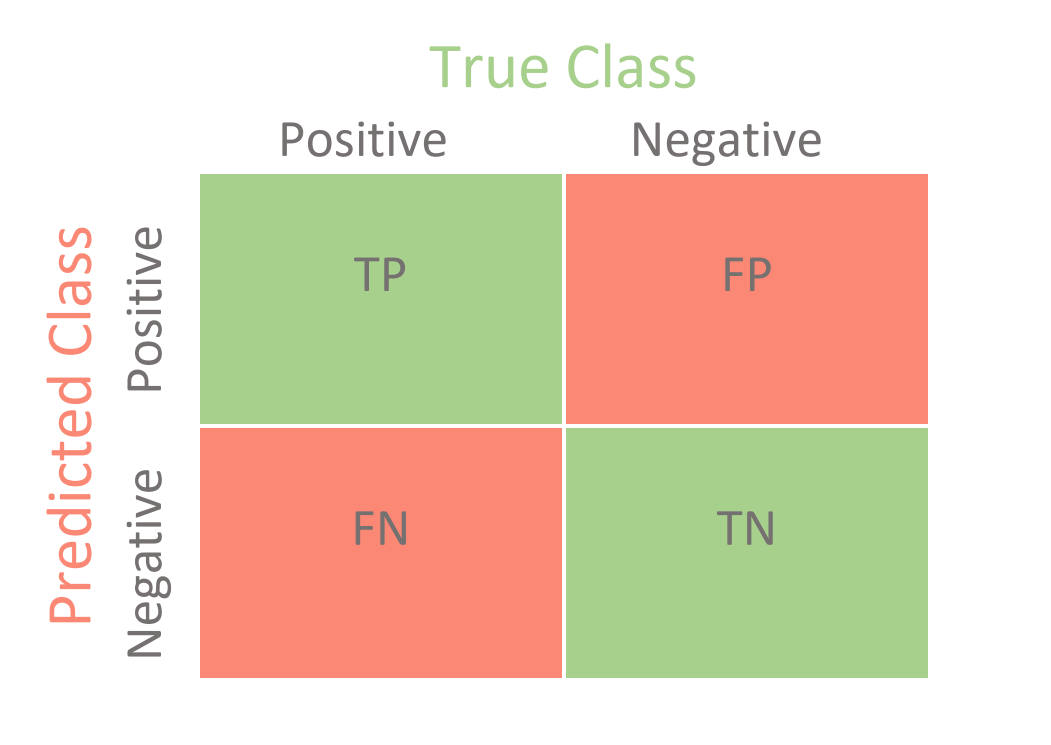

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
def plot_conf_matrix_pred_proba(model,x_train,x_test,target, train_pred, target_test, test_pred):
    
      
    # Building the confusion matrices
    def cm_calc(y_true,y_pred):
      # Compute confusion matrix to evaluate the accuracy of a classification.
      cm=confusion_matrix(y_true,y_pred,labels=np.unique(y_true))
      cm_sum=np.sum(cm,axis=1,keepdims=True)  # keepdims = true; In this case your dimensions of the array(Matrix) will be saved. That means the result you get is "broadcasted" correctly against the Array you are trying to implement the methods.
      cm_perc=cm/cm_sum.astype(float)*100
      annot=np.empty_like(cm).astype(str)
      nrows,ncols=cm.shape
      for i in range(nrows):
        for j in range(ncols):
          c=cm[i,j]   # select cm[i][j] element of matrix
          p=cm_perc[i,j]   
          if i==j:
            s=cm_sum[i]   
            annot[i,j]='%.1f%%\n%d/%d' % (p, c, s)
          elif c==0:
            annot[i,j]='0'
          else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

      cm=pd.DataFrame(cm,index=np.unique(y_true),columns=np.unique(y_true))
      cm.index.name="Actual"
      cm.columns.name='Predicted'
      return cm,annot

    
    #building the confusion matrix
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6),sharex=True)

    # Training data
    fpr, tpr, thresholds = metrics.roc_curve(target, model.predict_proba(x_train)[:,1])
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    


    ax=axes[0]
    ax.set_title("For training data")
    cm0,annot0=cm_calc(target,(model.predict_proba(x_train)[:,1]>=optimal_threshold))
    sns.heatmap(cm0,cmap="YlGnBu",annot=annot0,fmt='',ax=ax)
    tp=cm0[0][0]
    tn=cm0[1][1]
    fp=cm0[0][1]
    fn=cm0[1][0]
    acc_train=(tp+tn)/(tp+tn+fp+fn)
    prec_train=tp/(tp+fp)
    recall_train=tp/(tp+fn)
    f1_score_train=2*(prec_train*recall_train)/(prec_train + recall_train)
    auc_train=roc_auc_score(target,model.predict_proba(x_train)[:,1])
    print('---------TRAIN DATA------------------')
    print('Best threshold: {:0.2f}'.format(optimal_threshold))
    print('Accuracy of train model:',round(acc_train,2))
    print('Precision :',round(prec_train,2))
    print('Recall :',round(recall_train,2))
    print('f1_score :',round(f1_score_train,2))
    print('AUC_score :',round(auc_train,2))

    

    # Test data
    fpr, tpr, thresholds = metrics.roc_curve(target_test, model.predict_proba(x_test)[:,1])
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    

    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, (model.predict_proba(x_test)[:,1]>=optimal_threshold))
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)

    TP=cm1[0][0]
    TN=cm1[1][1]
    FP=cm1[0][1]
    FN=cm1[1][0]
    acc_test=(TP+TN)/(TP+TN+FP+FN)
    prec_test=TP/(TP+FP)
    recall_test=TP/(TP+FN)
    f1_score_test=2*(prec_test*recall_test)/(prec_test + recall_test)
    auc_test=roc_auc_score(target_test,model.predict_proba(x_test)[:,1])
    print('---------TEST DATA------------')
    print('Best threshold: {:0.2f}'.format(optimal_threshold))
    print('Accuracy of test model:',round(acc_test,2))
    print('Precision :',round(prec_test,2))
    print('Recall :',round(recall_test,2))
    print('f1_score :',round(f1_score_test,2))
    print('AUC_score :',round(auc_test,2))

    fig.suptitle('CONFUSION MATRICES')
    plt.show()
            

In [86]:
def plot_conf_matrix(model,x_train,x_test,target, train_pred, target_test, test_pred):
      
    # Building the confusion matrices
    def cm_calc(y_true,y_pred):
      # Compute confusion matrix to evaluate the accuracy of a classification.
      cm=confusion_matrix(y_true,y_pred,labels=np.unique(y_true))
      cm_sum=np.sum(cm,axis=1,keepdims=True)  # keepdims = true; In this case your dimensions of the array(Matrix) will be saved. That means the result you get is "broadcasted" correctly against the Array you are trying to implement the methods.
      cm_perc=cm/cm_sum.astype(float)*100
      annot=np.empty_like(cm).astype(str)
      nrows,ncols=cm.shape
      for i in range(nrows):
        for j in range(ncols):
          c=cm[i,j]   # select cm[i][j] element of matrix
          p=cm_perc[i,j]   
          if i==j:
            s=cm_sum[i]   
            annot[i,j]='%.1f%%\n%d/%d' % (p, c, s)
          elif c==0:
            annot[i,j]='0'
          else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

      cm=pd.DataFrame(cm,index=np.unique(y_true),columns=np.unique(y_true))
      cm.index.name="Actual"
      cm.columns.name='Predicted'
      return cm,annot

    
    #building the confusion matrix
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6),sharex=True)

    # Training data
    ax=axes[0]
    ax.set_title("For training data")
    cm0,annot0=cm_calc(target,train_pred)
    sns.heatmap(cm0,cmap="YlGnBu",annot=annot0,fmt='',ax=ax)
    tp=cm0[0][0]
    tn=cm0[1][1]
    fp=cm0[0][1]
    fn=cm0[1][0]
    acc_train=(tp+tn)/(tp+tn+fp+fn)
    prec_train=tp/(tp+fp)
    recall_train=tp/(tp+fn)
    f1_score_train=2*(prec_train*recall_train)/(prec_train + recall_train)
    auc_train=roc_auc_score(target,train_pred)
    print('---------TRAIN DATA------------------')
    print('Accuracy of train model:',round(acc_train,2))
    print('Precision :',round(prec_train,2))
    print('Recall :',round(recall_train,2))
    print('f1_score :',round(f1_score_train,2))
    print('AUC_score :',round(auc_train,2))

    

    # Test data
    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)

    TP=cm1[0][0]
    TN=cm1[1][1]
    FP=cm1[0][1]
    FN=cm1[1][0]
    acc_test=(TP+TN)/(TP+TN+FP+FN)
    prec_test=TP/(TP+FP)
    recall_test=TP/(TP+FN)
    f1_score_test=2*(prec_test*recall_test)/(prec_test + recall_test)
    auc_test=roc_auc_score(target_test,test_pred)
    print('---------TEST DATA------------')
    print('Accuracy of test model:',round(acc_test,2))
    print('Precision :',round(prec_test,2))
    print('Recall :',round(recall_test,2))
    print('f1_score :',round(f1_score_test,2))
    print('AUC_score :',round(auc_test,2))

    fig.suptitle('CONFUSION MATRICES')
    plt.show()
            

In [87]:
# how keepdims work
mat=np.array([[1,2,3],[4,5,6]])
print(mat[1,2])

mmm=np.sum(mat,axis=1,keepdims=True)
print(mmm)

sss=np.sum(mat,axis=1,keepdims=False)
print(sss)


6
[[ 6]
 [15]]
[ 6 15]


### Accuracy metrics Used in Different Model

We have Used 4 Different metrics<br>
1. ***R_squared (Higher better)*** - R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 
2. ***accuracy_score*** -In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
3. ***rmse(lower better)*** -Root of mean Squared Error.
4. ***acc_d(lower better)*** - Relative error between predicted y_pred and measured y_meas values.

In [88]:
def acc_metrics_calc(num,model,x_train,x_test,y_train,y_test,pred_prob):
  # The model selection stage
  # Calculation of accuracy of model by diffferent metrics
  global acc_all

  y_pred_train=model.predict(x_train).astype(int)    # predict on train data
  y_pred_test=model.predict(x_test).astype(int)      # predict on test data

  # #For AUC we require probabilities insted of binary values
  # y_pred_train_prob=model.predict(x_train)            # predict on train data as float
  # y_pred_test_prob=model.predict(x_test)              # predict on test data as float


  print('Unique values in y_test and their count:',np.unique(y_test,return_counts=True))
  print('Unique values in y_pred_test and their count:',np.unique(y_pred_test,return_counts=True))

  if num!=21:
    print('------------------------------')
    print('y_train =',y_train[:5].values)
    print('y_pred_train =',y_pred_train[:5])
    print('x_test =',y_test[:5].values)
    print('y_pred_test =',y_pred_test[:5])

  

  num_acc=0
  for x in metrics_now:
    if x==1:
      #r2_score criterion
      # R^2 (coefficient of determination) regression score function.
      acc_train=round(r2_score(y_train,y_pred_train)*100,2)
      acc_test=round(r2_score(y_test,y_pred_test)*100,2)

    elif x==2:
      #accuracy_score criterion
      acc_train=round(metrics.accuracy_score(y_train,y_pred_train) * 100, 2)
      acc_test=round(metrics.accuracy_score(y_test,y_pred_test) * 100, 2)

    elif x==3:
      #rmse criterion
      acc_train=round(acc_rmse(y_train,y_pred_train)*100,2)
      acc_test=round(acc_rmse(y_test,y_pred_test)*100,2)

    elif x == 4:
      #relative error criterion
      acc_train = round(acc_d(y_train,y_pred_train) * 100, 2)
      acc_test = round(acc_d(y_test,y_pred_test) * 100, 2)
        
    print('acc of', metrics_all[x], 'for train =', acc_train)
    print('acc of', metrics_all[x], 'for test =', acc_test)
    acc_all[num_acc].append(acc_train) #train
    acc_all[num_acc+1].append(acc_test) #test
    num_acc += 2
    
  #  Building the confusion matrices
  if(pred_prob):      # if predict_proba() exist for that model
    plot_conf_matrix_pred_proba(model,x_train,x_test,y_train, y_pred_train, y_test, y_pred_test)
  else:
    plot_conf_matrix(model,x_train,x_test,y_train, y_pred_train, y_test, y_pred_test)


# 6) Tuning models and test for all features 

* Now, After Using the Feature Selction Algorithms we have selected the Top 35 features which must be used to classify the patient into severe or Non-Severe patient.
* Since our problem is Supervised Machine Learning Classification Problem . So, We can try these Algorithms and Select the Best Algorithm from these which gives Best result on Test dataset .

* Linear Regression, Logistic Regression

Each model is built using cross-validation (except LGBM). The parameters of the model are selected to ensure the maximum matching of accuracy on the training and validation data. A plot is being built for this purpose with learning_curve from sklearn library.

### Tuning the hyper-parameters of an estimator

***Random search*** allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

To select the best set of hyperparameters we should use `grid search techniques`.<br>
It is possible and recommended to search the hyper-parameter space for the best cross validation score.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());

* a parameter space;

* a method for searching or sampling candidates;

* a cross-validation scheme; and

* a score function.

## 6.1 Linear Regression

Linear Regression is a linear approach to modeling the relationship between a  dependent variable and one or more  independent variables.<br>
Here We have Multiple independent variables so we use multiple Linear Regression.

In [95]:
#Linear Regression
lr=LinearRegression();    #Ordinary least squares Linear Regression.
lr_CV=GridSearchCV(lr,param_grid={},cv=cv_train,verbose=False)
lr_CV.fit(train, target)
acc_metrics_calc(0,lr_CV,train,test,target,target_test,0)

Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([1168,   10]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 0 0]
acc of r2_score for train = -25.21
acc of r2_score for test = -31.96
acc of acc for train = 77.21
acc of acc for test = 74.79
acc of rmse for train = 47.73
acc of rmse for test = 50.21
acc of re for train = 95.27
acc of re for test = 98.02
---------TRAIN DATA------------------
Accuracy of train model: 0.77
Precision : 0.77
Recall : 1.0
f1_score : 0.87
AUC_score : 0.52
---------TEST DATA------------
Accuracy of test model: 0.75
Precision : 0.75
Recall : 1.0
f1_score : 0.85
AUC_score : 0.51


In [96]:
# Building learning curve of model
plot_learning_curve(lr, "Linear Regression", train, target, cv=cv_train)

## 6.2 Logistic Regression

In [97]:
log_reg=LogisticRegression()
log_reg_CV=GridSearchCV(log_reg,param_grid={'C' : [.2, .3, .4]},cv=cv_train,verbose=False)   # C-  Inverse of regularization strength; must be a positive float.
log_reg_CV.fit(train, target)
print(log_reg_CV.best_params_)
acc_metrics_calc(1,log_reg_CV,train,test,target,target_test,1)


{'C': 0.3}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([1003,  175]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 11.65
acc of r2_score for test = 3.14
acc of acc for train = 83.92
acc of acc for test = 81.49
acc of rmse for train = 40.1
acc of rmse for test = 43.02
acc of re for train = 67.22
acc of re for test = 71.95
---------TRAIN DATA------------------
Best threshold: 0.19
Accuracy of train model: 0.76
Precision : 0.93
Recall : 0.74
f1_score : 0.83
AUC_score : 0.86
---------TEST DATA------------
Best threshold: 0.25
Accuracy of test model: 0.77
Precision : 0.89
Recall : 0.78
f1_score : 0.83
AUC_score : 0.83


In [98]:
# Building learning curve of model
plot_learning_curve(log_reg, "Logistic Regression", train, target, cv=cv_train)

## 6.3 Support Vector Machines

In [99]:
svr=SVC()
svr_CV=GridSearchCV(svr,param_grid={'kernel':['linear','rbf','poly','sigmoid'],'tol': [1e-3]},cv=cv_train, verbose=False)  #tol -Tolerance for stopping criteria
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(2,svr_CV,train,test,target,target_test,0)

{'kernel': 'linear', 'tol': 0.001}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([1077,  101]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 0 0]
acc of r2_score for train = 2.01
acc of r2_score for test = -3.08
acc of acc for train = 82.17
acc of acc for test = 80.31
acc of rmse for train = 42.23
acc of rmse for test = 44.38
acc of re for train = 74.56
acc of re for test = 76.57
---------TRAIN DATA------------------
Accuracy of train model: 0.82
Precision : 0.82
Recall : 0.98
f1_score : 0.89
AUC_score : 0.65
---------TEST DATA------------
Accuracy of test model: 0.8
Precision : 0.8
Recall : 0.98
f1_score : 0.88
AUC_score : 0.63


In [100]:
# Building learning curve of model
plot_learning_curve(svr, "Support Vector Machine", train, target, cv=cv_train)

## 6.4 Linear SVC

Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

Read more in the [User Guide.](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

In [101]:
# Linear SVR

linear_svc = LinearSVC()
param_grid = {'dual':[False],'C': np.linspace(1, 15, 15)}
linear_svc_CV=GridSearchCV(linear_svc,param_grid,cv=cv_train,verbose=False)
linear_svc_CV.fit(train,target)
print(linear_svc_CV.best_params_)
acc_metrics_calc(3,linear_svc_CV,train,test,target,target_test,0)

{'C': 2.0, 'dual': False}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([1018,  160]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 12.58
acc of r2_score for test = 8.03
acc of acc for train = 84.09
acc of acc for test = 82.43
acc of rmse for train = 39.88
acc of rmse for test = 41.92
acc of re for train = 66.51
acc of re for test = 68.32
---------TRAIN DATA------------------
Accuracy of train model: 0.84
Precision : 0.85
Recall : 0.96
f1_score : 0.9
AUC_score : 0.71
---------TEST DATA------------
Accuracy of test model: 0.82
Precision : 0.83
Recall : 0.96
f1_score : 0.89
AUC_score : 0.69


In [102]:
# Building learning curve of model
plot_learning_curve(linear_svc, "Linear SVR", train, target, cv=cv_train)

***LinearSVC has better AUC then SVC***

## 6.5 MLP Classifier

Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.<br>
User Guide For [Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

'lbfgs' is an optimizer in the family of quasi-Newton methods.


In [103]:
%%time
# MLPClassifier
mlp=MLPClassifier();
param_grid={'hidden_layer_sizes':[i for i in range(2,8)],'solver':['lbfgs', 'sgd', 'adam'],'activation':['relu','tanh'],'learning_rate':['adaptive'],'max_iter': [1000]}

mlp_CV = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_CV.fit(train, target)
print(mlp_CV.best_params_)
acc_metrics_calc(4,mlp_CV,train,test,target,target_test,1)

{'activation': 'relu', 'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([973, 205]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 0 0]
acc of r2_score for train = 19.74
acc of r2_score for test = 6.69
acc of acc for train = 85.39
acc of acc for test = 82.17
acc of rmse for train = 38.22
acc of rmse for test = 42.22
acc of re for train = 61.07
acc of re for test = 69.31
---------TRAIN DATA------------------
Best threshold: 0.27
Accuracy of train model: 0.8
Precision : 0.92
Recall : 0.8
f1_score : 0.86
AUC_score : 0.88
---------TEST DATA------------
Best threshold: 0.29
Accuracy of test model: 0.77
Precision : 0.88
Recall : 0.8
f1_score : 0.84
AUC_score : 0.83
CPU times: user 19min 3s, sys: 29.5 s, total: 19min 33s
Wall time: 5min

In [104]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

## 6.6 Decision Tree Classifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For more info read in the [User guide](https://scikit-learn.org/stable/modules/tree.html#tree)

In [105]:
decision_tree=DecisionTreeClassifier()
param_grid={'min_samples_leaf':[i for i in range(10,35)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(5,decision_tree_CV,train,test,target,target_test,1)

{'min_samples_leaf': 27}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([962, 216]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [1 0 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 19.12
acc of r2_score for test = 0.92
acc of acc for train = 85.28
acc of acc for test = 81.07
acc of rmse for train = 38.36
acc of rmse for test = 43.51
acc of re for train = 61.54
acc of re for test = 73.6
---------TRAIN DATA------------------
Best threshold: 0.25
Accuracy of train model: 0.77
Precision : 0.96
Recall : 0.73
f1_score : 0.83
AUC_score : 0.91
---------TEST DATA------------
Best threshold: 0.30
Accuracy of test model: 0.76
Precision : 0.88
Recall : 0.79
f1_score : 0.83
AUC_score : 0.79


In [106]:
# Building learning curve of model
plot_learning_curve(decision_tree_CV, "Decision Tree", train, target, cv=cv_train)

In [107]:
features_name=main_features
features_name.remove('Death')

### Visualizing Decision Tree

In [109]:
# DOT data
dot_data = export_graphviz(decision_tree_CV.best_estimator_,feature_names=features_name, class_names=['0','1'] ,out_file=None,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## 6.7 Random Forest Classifier

***A random forest classifier.***

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

***Random Forest*** is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

***Implementing Randomized Seach CV***

In [110]:
random_forest = RandomForestClassifier()

In [111]:
# Randomized Search CV
param_grid = {'n_estimators': [80,100,120], 
              'min_samples_split': [0.004,0.005,0.006],
              'min_samples_leaf': [0.004,0.005,0.006], 
              'max_features': ['auto', 'sqrt'],
              'class_weight':['balanced'],
              'criterion': ['gini'],
              'bootstrap': [False]}
random_forest_Rcv = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, n_iter=50 ,cv=cv_train, verbose=False)
random_forest_Rcv.fit(train, target)
print(random_forest_Rcv.best_params_)
acc_metrics_calc(6,random_forest_Rcv,train,test,target,target_test,1)

{'n_estimators': 80, 'min_samples_split': 0.005, 'min_samples_leaf': 0.004, 'max_features': 'sqrt', 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([818, 360]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 1 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 1]
acc of r2_score for train = 49.14
acc of r2_score for test = -6.19
acc of acc for train = 90.74
acc of acc for test = 79.71
acc of rmse for train = 30.42
acc of rmse for test = 45.04
acc of re for train = 38.7
acc of re for test = 78.88
---------TRAIN DATA------------------
Best threshold: 0.52
Accuracy of train model: 0.91
Precision : 0.98
Recall : 0.91
f1_score : 0.94
AUC_score : 0.97
---------TEST DATA------------
Best threshold: 0.45
Accuracy of test model: 0.77
Precision : 0.91
Recall : 0.77
f1_score : 0.83
AUC_score : 0.85


***Implementing Grid Search CV***

In [112]:
%%time
# Random Forest

param_grid = {'n_estimators': [110,120,125], 
              'min_samples_split': [0.0035,0.004,0.0045,0.005],
              'min_samples_leaf': [0.0035,0.004,0.0045,0.005], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight':['balanced'],
              'criterion': ['gini'],
              'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
acc_metrics_calc(6,random_forest_CV,train,test,target,target_test,1)

{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 0.0035, 'min_samples_split': 0.004, 'n_estimators': 125}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([827, 351]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 1 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 1]
acc of r2_score for train = 58.47
acc of r2_score for test = -4.86
acc of acc for train = 92.44
acc of acc for test = 79.97
acc of rmse for train = 27.49
acc of rmse for test = 44.76
acc of re for train = 31.6
acc of re for test = 77.89
---------TRAIN DATA------------------
Best threshold: 0.51
Accuracy of train model: 0.93
Precision : 0.99
Recall : 0.92
f1_score : 0.95
AUC_score : 0.98
---------TEST DATA------------
Best threshold: 0.45
Accuracy of test model: 0.77
Precision : 0.91
Recall : 0.78
f1_score : 0.84
AUC_score : 0.85
CPU times:

In [113]:
# Building learning curve of model
plot_learning_curve(random_forest, "Random Forest", train, target, cv=cv_train)

`Now We will apply Boosting Techniques`

##6.8 AdaBoost Classifier

The core principle of ***AdaBoost*** is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights 
w1, 
w2, …, wn
 to each of the training samples. Initially, those weights are all set to 
, so that the first step simply trains a weak learner on the original data. <br>For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence 

In [114]:
param_dist={
     'n_estimators':[50,70,100,120],
     'learning_rate' : [0.05, 0.08, 0.09 ,0.1,0.11, 0.12]
}

In [115]:
Ada_Boost=AdaBoostClassifier();

***Implementing Randomized Seach CV***

In [116]:
Ada_Boost_Rcv=RandomizedSearchCV(Ada_Boost,param_distributions=param_dist,scoring='roc_auc',n_iter=30,n_jobs=-1,random_state=42)
Ada_Boost_Rcv.fit(train,target)
acc_metrics_calc(7,Ada_Boost_Rcv,train,test,target,target_test,1)

Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([1007,  171]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 16.63
acc of r2_score for test = 12.91
acc of acc for train = 84.83
acc of acc for test = 83.36
acc of rmse for train = 38.95
acc of rmse for test = 40.79
acc of re for train = 63.43
acc of re for test = 64.69
---------TRAIN DATA------------------
Best threshold: 0.48
Accuracy of train model: 0.79
Precision : 0.92
Recall : 0.8
f1_score : 0.85
AUC_score : 0.88
---------TEST DATA------------
Best threshold: 0.48
Accuracy of test model: 0.78
Precision : 0.9
Recall : 0.79
f1_score : 0.84
AUC_score : 0.84


In [117]:
print(Ada_Boost_Rcv.best_params_)

{'n_estimators': 120, 'learning_rate': 0.12}


From these results, we should be able to narrow the range of values for each hyperparameter.

***Implementing Grid Search Cv***

In [ ]:
param_grid={'n_estimators': [90,100,110,120,140],'learning_rate' : [0.09,0.10 ,0.11, 0.12,0.13,0.14]}
Ada_Boost_CV=GridSearchCV(estimator=Ada_Boost,param_grid=param_grid,cv=cv_train,verbose=False)
Ada_Boost_CV.fit(train,target)
print(Ada_Boost_CV.best_params_)
acc_metrics_calc(7,random_forest_CV,train,test,target,target_test,1)

In [ ]:
# Building learning curve of model
plot_learning_curve(Ada_Boost, "AdaBoost Classifier", train, target, cv=cv_train)

## 6.9 Gradient Boost Classifier

Gradient Boosting relies on the intuition that the best possible next model , when combined with the previous models, minimizes the overall prediction errors. The key idea is to set the target outcomes from the previous models to the next model in order to minimize the errors

***Input requirement for Gradient Boosting:***

* A Loss Function to optimize.
* A weak learner to make prediction(Generally Decision tree).
* An additive model to add weak learners to minimize the loss function.

In [121]:
gradient_boosting = GradientBoostingClassifier()

In [122]:
# Randomized Search CV
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09,0.10],
              'n_estimators':[80,100,120,140],
              'max_depth': [i for i in range(2,8)],
              'min_samples_leaf': [i for i in range(3,12)],
              'random_state':[42]
              }

gradient_boosting_Rcv = RandomizedSearchCV(estimator=gradient_boosting, param_distributions=param_grid, cv=cv_train, verbose=False)
gradient_boosting_Rcv.fit(train, target)
acc_metrics_calc(8,gradient_boosting_Rcv,train,test,target,target_test,1)

Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([988, 190]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 38.4
acc of r2_score for test = 16.02
acc of acc for train = 88.79
acc of acc for test = 83.96
acc of rmse for train = 33.48
acc of rmse for test = 40.06
acc of re for train = 46.86
acc of re for test = 62.38
---------TRAIN DATA------------------
Best threshold: 0.24
Accuracy of train model: 0.85
Precision : 0.95
Recall : 0.85
f1_score : 0.9
AUC_score : 0.93
---------TEST DATA------------
Best threshold: 0.29
Accuracy of test model: 0.82
Precision : 0.9
Recall : 0.85
f1_score : 0.88
AUC_score : 0.86


In [123]:
print(gradient_boosting_Rcv.best_params_)

{'random_state': 42, 'n_estimators': 140, 'min_samples_leaf': 9, 'max_depth': 3, 'learning_rate': 0.06}


***Implementing Grid Search CV***

In [124]:
# Gradient Boosting Classifier

param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09,0.10],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False)
gradient_boosting_CV.fit(train, target)
print(gradient_boosting_CV.best_params_)
acc_metrics_calc(8,gradient_boosting_CV,train,test,target,target_test,1)

{'learning_rate': 0.07, 'max_depth': 4, 'min_samples_leaf': 4}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([984, 194]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 49.76
acc of r2_score for test = 16.91
acc of acc for train = 90.86
acc of acc for test = 84.13
acc of rmse for train = 30.24
acc of rmse for test = 39.84
acc of re for train = 38.22
acc of re for test = 61.72
---------TRAIN DATA------------------
Best threshold: 0.26
Accuracy of train model: 0.89
Precision : 0.96
Recall : 0.89
f1_score : 0.92
AUC_score : 0.96
---------TEST DATA------------
Best threshold: 0.30
Accuracy of test model: 0.82
Precision : 0.89
Recall : 0.87
f1_score : 0.88
AUC_score : 0.86


In [125]:
# Building learning curve of model
plot_learning_curve(gradient_boosting, "Gradient Boosting Classifier", train, target, cv=cv_train)

## 6.10 XGBoost Classifier

`What makes XGBoost a go-to algorithm for winning Machine Learning and Kaggle competitions?`

Isn’t it interesting to see a single tool to handle all our boosting problems! Here are the features with details and how they are incorporated in XGBoost to make it robust.

In [126]:
train.columns

Index(['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1',
       'C-Reactive Prot > 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP < 70',
       'O2 Sat < 94', 'OsSats', 'Procalciton > 0.1', 'Severity', 'Sodium',
       'Troponin', 'AST > 40', 'AgeScore', 'BUN > 30', 'BUNYes', 'Creatinine',
       'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 > 150', 'LOS_Y',
       'Lympho', 'Lymphocytes < 1', 'PVD', 'Stroke', 'Temp'],
      dtype='object')

In [127]:
train_new=train
test_new=test

In [128]:
train_new.columns

Index(['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1',
       'C-Reactive Prot > 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP < 70',
       'O2 Sat < 94', 'OsSats', 'Procalciton > 0.1', 'Severity', 'Sodium',
       'Troponin', 'AST > 40', 'AgeScore', 'BUN > 30', 'BUNYes', 'Creatinine',
       'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 > 150', 'LOS_Y',
       'Lympho', 'Lymphocytes < 1', 'PVD', 'Stroke', 'Temp'],
      dtype='object')

In [129]:
import re
regex = re.compile(r"\[|\]|<|>", re.IGNORECASE)

train_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in train_new.columns.values]
test_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in test_new.columns.values]

In [130]:
train.columns

Index(['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1',
       'C-Reactive Prot _ 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP _ 70',
       'O2 Sat _ 94', 'OsSats', 'Procalciton _ 0.1', 'Severity', 'Sodium',
       'Troponin', 'AST _ 40', 'AgeScore', 'BUN _ 30', 'BUNYes', 'Creatinine',
       'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 _ 150', 'LOS_Y',
       'Lympho', 'Lymphocytes _ 1', 'PVD', 'Stroke', 'Temp'],
      dtype='object')

In [131]:
train_new.columns

Index(['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1',
       'C-Reactive Prot _ 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP _ 70',
       'O2 Sat _ 94', 'OsSats', 'Procalciton _ 0.1', 'Severity', 'Sodium',
       'Troponin', 'AST _ 40', 'AgeScore', 'BUN _ 30', 'BUNYes', 'Creatinine',
       'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 _ 150', 'LOS_Y',
       'Lympho', 'Lymphocytes _ 1', 'PVD', 'Stroke', 'Temp'],
      dtype='object')

In [132]:
test_new.columns

Index(['ALT', 'AST', 'BUN', 'Glucose', 'MAP', 'Plts', 'Procalcitonin', 'Age.1',
       'C-Reactive Prot _ 10', 'CrctProtein', 'Ddimer', 'LOS', 'MAP _ 70',
       'O2 Sat _ 94', 'OsSats', 'Procalciton _ 0.1', 'Severity', 'Sodium',
       'Troponin', 'AST _ 40', 'AgeScore', 'BUN _ 30', 'BUNYes', 'Creatinine',
       'CrtnScore', 'DDimerYes', 'Ferritin', 'IL6', 'IL6 _ 150', 'LOS_Y',
       'Lympho', 'Lymphocytes _ 1', 'PVD', 'Stroke', 'Temp'],
      dtype='object')

In [133]:
target.name

'Death'

In [134]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier() 

***Randomized Seach CV***

n_iter:int, default=10<br>
Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution

In [119]:
print(counter[0])
print(counter[1])
print(counter[0]/counter[1])

2688
845
3.1810650887573964


In [152]:
%%time

parameters = {'objective':['binary:logistic'],
              'n_estimators': [80, 90, 100,110], 
              'learning_rate': [0.09, 0.1, 0.12],
              'max_depth': [6,7, 8],
              'min_child_weight':[2,5,8],
              'gamma': [0,1,2,3,4],
              'subsample':[0.7,0.8],
              'lambda':[1,2,3,4,5,6],
              'alpha':[5,6,7,8,10,12],
              'scale_pos_weight':[counter[0]/counter[1]],
              'eval_metric':['auc']
              }
xgb_Rcv = RandomizedSearchCV(estimator=xgb_clf, param_distributions=parameters, cv=cv_train,scoring=['roc_auc','accuracy','f1'],refit='roc_auc',
                             verbose=False,n_iter=140,random_state=42)
xgb_Rcv.fit(train_new,target)
print("Best score: %0.3f" % xgb_Rcv.best_score_)
print("Best parameters set:", xgb_Rcv.best_params_)
acc_metrics_calc(9,xgb_Rcv,train_new,test,target,target_test,1)

Best score: 0.880
Best parameters set: {'subsample': 0.8, 'scale_pos_weight': 3.1810650887573964, 'objective': 'binary:logistic', 'n_estimators': 90, 'min_child_weight': 8, 'max_depth': 7, 'learning_rate': 0.09, 'lambda': 2, 'gamma': 3, 'eval_metric': 'auc', 'alpha': 6}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([809, 369]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 1]
acc of r2_score for train = 46.65
acc of r2_score for test = -6.64
acc of acc for train = 90.29
acc of acc for test = 79.63
acc of rmse for train = 31.16
acc of rmse for test = 45.14
acc of re for train = 40.59
acc of re for test = 79.21
---------TRAIN DATA------------------
Best threshold: 0.51
Accuracy of train model: 0.91
Precision : 0.98
Recall : 0.9
f1_score : 0.94
AUC_score : 0.97
---------TEST DATA------------
Best threshold: 0.44
Acc

***GridSearchCV***

In [ ]:
%%time

counter=Counter(target)
parameters = {'objective':['binary:logistic'],
              'n_estimators': [80,85,90], 
              'learning_rate': [0.08,0.09, 0.095],
              'max_depth': [7,8,9],
              'gamma': [0,1,2,3],
              'alpha':[3,4,5],
              'subsample':[0.6,0.7,0.8],
              'lambda':[6,7,8],
              'scale_pos_weight':[counter[0]/counter[1]]
              }
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(train_new, target)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(9,xgb_reg,train_new,test_new,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(xgb_clf, "XGBoost Classifier", train_new, target, cv=cv_train)

## 6.13 BaggingClassifier 

Bootstrap aggregating, also called Bagging

A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

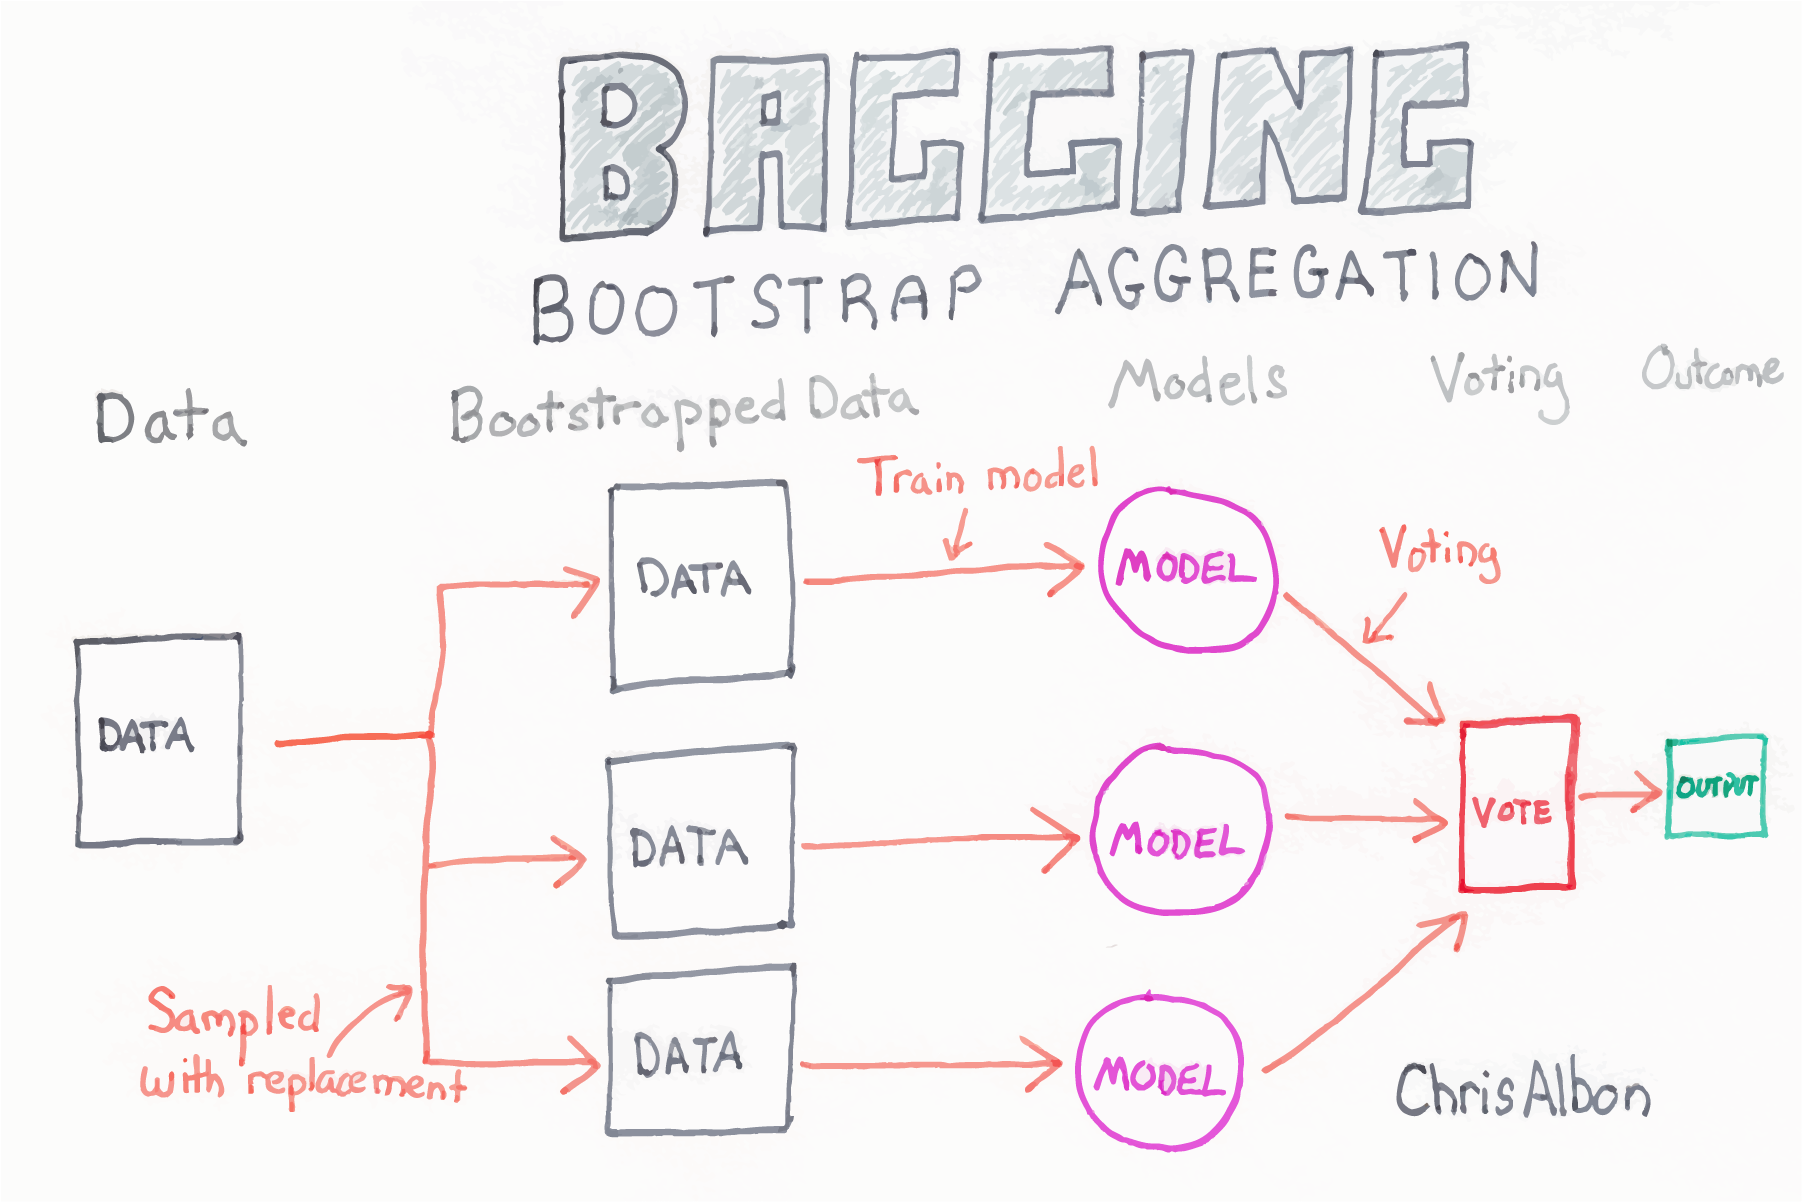

In [149]:
bagging=BaggingClassifier();
param_grid={'max_features': [0.85, 0.9, 0.95,1.0],
                        'max_samples':[0.6,0.7,0.8,0.9,1.0],
                        'n_estimators': [6,8,9,10],
                        'warm_start' : [False],
                        'random_state':[42]
                        
            }
bagging_CV = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=cv_train, verbose=False)
bagging_CV.fit(train, target)
print(bagging_CV.best_params_)
acc_metrics_calc(12,bagging_CV,train,test,target,target_test,1)                        

{'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 10, 'random_state': 42, 'warm_start': False}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([990, 188]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 1 0 1 0]
x_test = [0 0 0 0 1]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 88.49
acc of r2_score for test = 7.14
acc of acc for train = 97.91
acc of acc for test = 82.26
acc of rmse for train = 14.47
acc of rmse for test = 42.12
acc of re for train = 8.76
acc of re for test = 68.98
---------TRAIN DATA------------------
Best threshold: 0.50
Accuracy of train model: 0.99
Precision : 0.99
Recall : 0.99
f1_score : 0.99
AUC_score : 1.0
---------TEST DATA------------
Best threshold: 0.40
Accuracy of test model: 0.8
Precision : 0.89
Recall : 0.83
f1_score : 0.86
AUC_score : 0.84


In [150]:
# Building learning curve of model
plot_learning_curve(bagging, "Bagging Classifier", train, target, cv=cv_train)

## 6.15 k-Nearest Neighbors (KNN)

In [148]:
# KNN - k-Nearest Neighbors algorithm

knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': [7,8,9,10]}, cv=cv_train, verbose=False)
knn_CV.fit(train, target)
print(knn_CV.best_params_)
acc_metrics_calc(14,knn_CV,train,test,target,target_test,1)


In [ ]:
# Building learning curve of model
plot_learning_curve(knn, "KNN", train, target, cv=cv_train)

## 6.16 Naive Bayes 

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

In [135]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-2,1e-4, 1e-5, 1e-6,1e-7,1e-8,1e-9]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False)
gaussian_CV.fit(train, target)
print(gaussian_CV.best_params_)
acc_metrics_calc(15,gaussian_CV,train,test,target,target_test,1)

{'var_smoothing': 1e-06}
Unique values in y_test and their count: (array([0, 1]), array([875, 303]))
Unique values in y_pred_test and their count: (array([0, 1]), array([957, 221]))
------------------------------
y_train = [0 1 0 1 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 0 1]
y_pred_test = [1 0 0 1 0]
acc of r2_score for train = -3.28
acc of r2_score for test = -3.97
acc of acc for train = 81.21
acc of acc for test = 80.14
acc of rmse for train = 43.35
acc of rmse for test = 44.57
acc of re for train = 78.58
acc of re for test = 77.23
---------TRAIN DATA------------------
Best threshold: 0.00
Accuracy of train model: 0.72
Precision : 0.94
Recall : 0.68
f1_score : 0.79
AUC_score : 0.84
---------TEST DATA------------
Best threshold: 0.00
Accuracy of test model: 0.76
Precision : 0.89
Recall : 0.77
f1_score : 0.83
AUC_score : 0.82


In [136]:
# Building learning curve of model
plot_learning_curve(gaussian, "Gaussian Naive Bayes", train, target, cv=cv_train)

## 6.18 Voting Classifier 

In [ ]:
# Voting Classifier

Voting_ens = VotingClassifier(estimators=[('log', log_reg_CV), ('mlp', mlp_CV ),('Random_forest',random_forest_CV),('xgb_clf', xgb_Rcv),
                                          ('AdaBoost',Ada_Boost_CV),('GradBoost',gradient_boosting_CV)],voting='soft')
Voting_ens.fit(train, target)
acc_metrics_calc(18,Voting_ens,train,test,target,target_test,1)

Unique values in y_test and their count: (array([0, 1]), array([917, 261]))
Unique values in y_pred_test and their count: (array([0, 1]), array([966, 212]))
------------------------------
y_train = [0 0 0 0 0]
y_pred_train = [0 0 0 0 0]
x_test = [0 0 0 1 0]
y_pred_test = [0 0 0 1 0]
acc of r2_score for train = 50.93
acc of r2_score for test = 11.9
acc of acc for train = 90.77
acc of acc for test = 84.8
acc of rmse for train = 30.38
acc of rmse for test = 38.98
acc of re for train = 36.75
acc of re for test = 68.58
---------TRAIN DATA------------------
Best threshold: 0.37
Accuracy of train model: 0.89
Precision : 0.97
Recall : 0.88
f1_score : 0.92
AUC_score : 0.97
---------TEST DATA------------
Best threshold: 0.37
Accuracy of test model: 0.81
Precision : 0.91
Recall : 0.84
f1_score : 0.87
AUC_score : 0.87


# 7) Model Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem.



In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression','Support Vector Maxhines' 'Linear SVC', 
              'MLP Classifier', 'Decision Tree Classifier','Random Forest Classifier',
              'AdaBoost Classifier','Gradient Boosting Classifier','XGB Classifier', 'LGBM Classifier',
              'Ridge classifier', 'Bagging Classifier', 'ExtraTrees Classifier', 
              'KNN', 'Naive Bayes', 'NN model','VotingClassifier']})

In [ ]:
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1] 
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']
#models

In [ ]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)